Zomato Restaurant
Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



Importing of Libraries

# Power project as Regression problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [2]:
#Zomato=pd.read_csv('zomato1.csv')
#Zomato


As extracting data is Difficult due to encoding techniques following steps can be used

In [3]:
#df = pd.read_csv("zomato1.csv",sep = "\\t\", encoding='latin'")

In [3]:
df1=pd.read_csv('zomato1.csv', encoding_errors= 'replace')
df1

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [4]:
df2=pd.read_excel('Country-Code.xlsx')
df2

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In Dataset Country-Code.csv there are Country Code and Country
Now lets Merge the Both Dataset

In [5]:
Zomato=pd.merge(df1,df2,how='left')
Zomato

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                Yes   
1     14.553708                          Japanese  ...                Yes   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                Yes   
3     14.585318                   Japanese, Sushi  ...                 No   
4     14.584450                  Japanese, Korean  ...                Yes   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                 No   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                 No   
9548  41.055817            Italian, World Cuisine  ...                 No   
9549  41.057979                   Restaurant Cafe  ...                 No   

The dataframe have 22 columns and 9551 rows. 22 columns have  object(14)and int64(5) float 03 data type. Null values are also present in the dataset.
The input contains boths label and target variable.
In task 1, "Average Cost for two" is the target variable which contains continuous data, so it is a regression type problem.
In task 2, "Price range" is the target variable which has classes, so it is a regression problem.

In [6]:
Zomato.shape

(9551, 22)

 we can see that  we have 9551 rows and  22 columns ie attributes and when we check the shape its showing 22 which mean two column's  are target Average Cost for two ,Price range

In [7]:
Zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

All the above 26 columns have  Null and non null  values and out of 26 attributes or input columns we have only 1 columns as output and and rest all are 26 columns are int -00,object-12 and Float=15. and object has to be changed using Ordinal encoder

Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset ....

Here we can see that all the columns counts are equal except Cuisines which means that there is no Missing values except in one columns 
..
There are three data type present in dataset float64,int64,object.. in which 3 columns zre of float64, 5 columns of int64 and 14 columns of object..

In [9]:
Zomato.columns = Zomato.columns.str.replace(' ', '_')
Zomato.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
Zomato.isnull().sum()     #no Missing Values

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

null values exists in 'Cuisines'

In [11]:
Zomato

Restaurant_ID           Restaurant_Name  Country_Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality_Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...  Has_Table_booking  \
0     14.565443        French, Japanese, Desserts  ...                Yes   
1     14.553708                          Japanese  ...                Yes   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                Yes   
3     14.585318                   Japanese, Sushi  ...                 No   
4     14.584450                  Japanese, Korean  ...                Yes   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                 No   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                 No   
9548  41.055817            Italian, World Cuisine  ...                 No   
9549  41.057979                   Restaurant Cafe  ...                 No   

In [12]:
Zomato.nunique()

Restaurant_ID           9551
Restaurant_Name         7446
Country_Code              15
City                     141
Address                 8918
Locality                1208
Locality_Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average_Cost_for_two     140
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Aggregate_rating          33
Rating_color               6
Rating_text                6
Votes                   1012
Country                   15
dtype: int64

Since Cuisines have 9 null values we have to identify which country has cuisines,as different countiies have diferent cuisines we can t use mode directly

In [13]:
Zomato.loc[Zomato['Cuisines'].isna()]

Restaurant_ID                 Restaurant_Name  Country_Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville                51 W Main St, Dahlonega, GA 30533   
328           Macon                   543 Cherry St, Macon, GA 31201   
346          Miller             109 N Broadway Ave, Miller, SD 57362   
368         Orlando  215 South Orlando Avenue, Winter Park, FL 32789   
418  Rest of Hawaii             933 Kapahulu Ave, Honolulu, HI 96816   
455        Savannah          1311 Butler Ave, Tybee Island, GA 31328   

         Locality         Locality_Verbose   Longitude   Latitude Cuisines  \
84         Albany           Albany, Albany  -84.154000  31.577200      NaN   
87         Albany           Albany, Albany  -84.175900  31.588200      NaN   
94         Albany           Albany, Albany  -84.153400  31.575100      NaN   
297     Dahlonega   Dahlonega, Gainesville  -83.985800  34.531800      NaN   
328         Macon             Macon, Macon  -83.627979  32.836410      NaN   
346        Miller           Miller, Miller  -98.989100  44.515800      NaN   
368   Winter Park     Winter Park, Orlando  -81.365260  28.596682      NaN   
418       Kaimuki  Kaimuki, Rest of Hawaii -157.813432  21.284586      NaN   
455  Tybee Island   Tybee Island, Savannah  -80.848297  31.995810      NaN   

     ...  Has_Table_booking Has_Online_delivery Is_delivering_now  \
84   ...                 No                  No                No   
87   ...                 No                  No                No   
94   ...                 No                  No                No   
297  ...                 No                  No                No   
328  ...                 No                  No                No   
346  ...                 No                  No                No   
368  ...                 No                  No                No   
418  ...                 No                  No                No   
455  ...                 No                  No                No   

    Switch_to_order_menu Price_range Aggregate_rating  Rating_color  \
84                    No           1              3.4        Orange   
87                    No           1              3.4        Orange   
94                    No           1              3.9        Yellow   
297                   No           3              3.9        Yellow   
328                   No           3              3.8        Yellow   
346                   No           1              3.4        Orange   
368                   No           3              4.4         Green   
418                   No           1              4.7    Dark Green   
455                   No           1              3.9        Yellow   

     Rating_text Votes        Country  
84       Average    34  United States  
87       Average    36  United States  
94          Good   160  United States  
297         Good   209  United States  
328         Good   102  United States  
346      Average    11  United States  
368    Very Good  1158  United States  
418    Excellent   707  United States  
455         Good   309  United States  

[9 rows x 22 column

we can see 9 nan values belongs to united states hence we will replace the nan values

In [14]:
Zomato1 = pd.DataFrame({'US_Cuisines':[]})
Zomato1

Empty DataFrame
Columns: [US_Cuisines]
Index: []

In [15]:
Zomato1['US_Cuisines']=Zomato['Cuisines'].loc[Zomato["Country"] == 'United States'].mode()[0]

In [16]:
Zomato['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [17]:
# from above, most US cuisine is 'Mexican'. Replaceing all Nans with 'Mexican'

In [18]:
Zomato['Cuisines'] = Zomato['Cuisines'].replace(np.nan,'Mexican')

In [19]:
Zomato['Cuisines'].isna().sum()

0

In [20]:
Zomato.isnull().sum() 

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

All nan values are filled with mode as mexican

lets Drop unwanted data ie 'Restaurant_Name','Address' which donrt play a vital role

In [21]:

Zomato.drop(['Restaurant_Name','Address'],axis=1,inplace=True)
Zomato

Restaurant_ID  Country_Code              City  \
0           6317637           162       Makati City   
1           6304287           162       Makati City   
2           6300002           162  Mandaluyong City   
3           6318506           162  Mandaluyong City   
4           6314302           162  Mandaluyong City   
...             ...           ...               ...   
9546        5915730           208         ��stanbul   
9547        5908749           208         ��stanbul   
9548        5915807           208         ��stanbul   
9549        5916112           208         ��stanbul   
9550        5927402           208         ��stanbul   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality_Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average_Cost_for_two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776                              Cafe                    55   

              Currency Has_Table_booking Has_Online_delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9546  Turkish Lira(TL)                No                  No   
9547  Turkish Lira(TL)                No                  No   
9548  Turkish Lira(TL)                No                  No   
9549  Turkish Lira(TL)                No                  No   
9550  Turkish Lira(TL)                No                  No   

     Is_delivering_now Switch_to_order_menu  Price_range  Aggregate_rating  \
0                   No                   No            3               4.8   
1                   No                   

In [23]:
#dropping duplicate rows and resetting index
Zomato=Zomato.drop_duplicates()
print('Number of rows after removing duplicates=', len(Zomato))

Number of rows after removing duplicates= 9551


<AxesSubplot:>

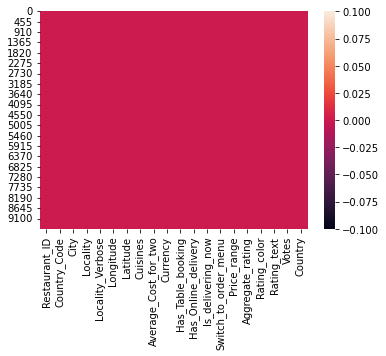

In [22]:
sns.heatmap(Zomato.isnull())

In [23]:
Zomato.duplicated().sum()# No Duplicate Values

0

In [24]:
Zomato

Restaurant_ID  Country_Code              City  \
0           6317637           162       Makati City   
1           6304287           162       Makati City   
2           6300002           162  Mandaluyong City   
3           6318506           162  Mandaluyong City   
4           6314302           162  Mandaluyong City   
...             ...           ...               ...   
9546        5915730           208         ��stanbul   
9547        5908749           208         ��stanbul   
9548        5915807           208         ��stanbul   
9549        5916112           208         ��stanbul   
9550        5927402           208         ��stanbul   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality_Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average_Cost_for_two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776                              Cafe                    55   

              Currency Has_Table_booking Has_Online_delivery  \
0     Botswana Pula(P)               Yes                  No   
1     Botswana Pula(P)               Yes                  No   
2     Botswana Pula(P)               Yes                  No   
3     Botswana Pula(P)                No                  No   
4     Botswana Pula(P)               Yes                  No   
...                ...               ...                 ...   
9546  Turkish Lira(TL)                No                  No   
9547  Turkish Lira(TL)                No                  No   
9548  Turkish Lira(TL)                No                  No   
9549  Turkish Lira(TL)                No                  No   
9550  Turkish Lira(TL)                No                  No   

     Is_delivering_now Switch_to_order_menu  Price_range  Aggregate_rating  \
0                   No                   No            3               4.8   
1                   No                   

We will analyse Both the target variables simultaneously

In [26]:
#Frequency of 'Average_Cost_for_two'
Zomato['Average_Cost_for_two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average_Cost_for_two, Length: 140, dtype: int64

In [27]:
#Frequency of 'Price_range'
Zomato['Price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64

<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='count'>

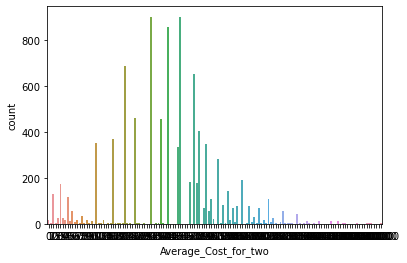

In [28]:
# Plotting the 'Average_Cost_for_two' frequency
sns.countplot(data=Zomato,x='Average_Cost_for_two')

<AxesSubplot:xlabel='Price_range', ylabel='count'>

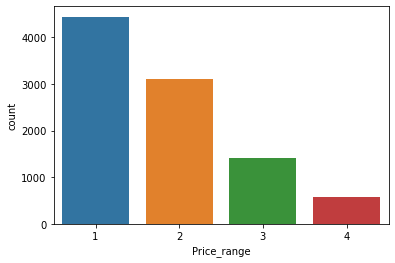

In [31]:
# Plotting the 'Price_range' frequency
sns.countplot(data=Zomato,x='Price_range')

In [32]:
#Normalizing the frequency table of 'Average_Cost_for_two' variable
Zomato['Average_Cost_for_two'].value_counts(normalize=True)

500       0.094231
300       0.093917
400       0.089729
200       0.071930
600       0.068265
            ...   
8000      0.000105
2350      0.000105
150000    0.000105
70000     0.000105
545       0.000105
Name: Average_Cost_for_two, Length: 140, dtype: float64

In [33]:
#Normalizing the frequency table of 'Price_range' variable
Zomato['Price_range'].value_counts(normalize=True)

1    0.465292
2    0.325934
3    0.147419
4    0.061355
Name: Price_range, dtype: float64

# EDA

Encoding Techniques

In [29]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Zomato.columns:
    if Zomato[i].dtypes=='object':
        Zomato[i]=enc.fit_transform(Zomato[i].values.reshape(-1,1))
Zomato

Restaurant_ID  Country_Code   City  Locality  Locality_Verbose  \
0           6317637           162   73.0     171.0             172.0   
1           6304287           162   73.0     593.0             601.0   
2           6300002           162   75.0     308.0             314.0   
3           6318506           162   75.0     862.0             875.0   
4           6314302           162   75.0     862.0             875.0   
...             ...           ...    ...       ...               ...   
9546        5915730           208  140.0     517.0             523.0   
9547        5908749           208  140.0     552.0             558.0   
9548        5915807           208  140.0     554.0             561.0   
9549        5916112           208  140.0     554.0             561.0   
9550        5927402           208  140.0     670.0             681.0   

       Longitude   Latitude  Cuisines  Average_Cost_for_two  Currency  \
0     121.027535  14.565443     920.0                  1100       0.0   
1     121.014101  14.553708    1111.0                  1200       0.0   
2     121.056831  14.581404    1671.0                  4000       0.0   
3     121.056475  14.585318    1126.0                  1500       0.0   
4     121.057508  14.584450    1122.0                  1500       0.0   
...          ...        ...       ...                   ...       ...   
9546   28.977392  41.022793    1813.0                    80      11.0   
9547   29.041297  41.009847    1824.0                   105      11.0   
9548   29.034640  41.055817    1110.0                   170      11.0   
9549   29.036019  41.057979    1657.0                   120      11.0   
9550   29.026016  40.984776     331.0                    55      11.0   

      Has_Table_booking  Has_Online_delivery  Is_delivering_now  \
0                   1.0                  0.0                0.0   
1                   1.0                  0.0                0.0   
2                   1.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   1.0                  0.0                0.0   
...                 ...                  ...                ...   
9546                0.0                  0.0                0.0   
9547                0.0                  0.0                0.0   
9548                0.0                  0.0                0.0   
9549                0.0                  0.0                0.0   
9550                0.0                  0.0                0.0   

      Switch_to_order_menu  Price_range  Aggregate_rating  Rating_color  \
0                      0.0            3               4.8           0.0   
1                      0.0            3               4.5           0.0   
2                      0.0            4               4.4           1.0   
3                      0.0            4               4.9           0.0   
4                      0.0            4               4.8           0.0   
...                    ...          ...               ...           ...   
9546                   0.0            3               4.1           1.0   
9547                   0.0            3               4.2           1.0   
9548                   0.0            4               3.7           5.0   
9549                   0.0            4               4.0           1.0   
9550                   0.0            2               4.0           1.0   

      Rating_text  Votes  Country  
0             1.0    314      6.0  
1             1.0    591      6.0  
2             5.0    270      6.0  
3             1.0    365      6.0  
4             1.0    229      6.0  
...           ...    ...      ...  
9546          5.0    788     11.0  
9547          5.0   1034     11.0  
9548          2.0    661     11.0  
9549          5.0    901     11.0  
9550          5.0    591     11.0  

[9551 rows x 20 columns]

by using encoding techniques we have converted into float  from Object  

In [30]:
Zomato.dtypes

Restaurant_ID             int64
Country_Code              int64
City                    float64
Locality                float64
Locality_Verbose        float64
Longitude               float64
Latitude                float64
Cuisines                float64
Average_Cost_for_two      int64
Currency                float64
Has_Table_booking       float64
Has_Online_delivery     float64
Is_delivering_now       float64
Switch_to_order_menu    float64
Price_range               int64
Aggregate_rating        float64
Rating_color            float64
Rating_text             float64
Votes                     int64
Country                 float64
dtype: object

Dataset have int64,object and float64 as data type..Target variable Average Cost of two is int64 which make it a Regression problem

Visualization using Count and Bar Plot for Input and output Variables

Count and Bar Plot for Average_Cost_for_two

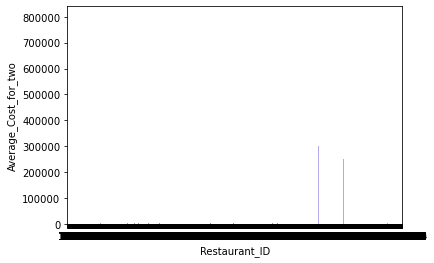

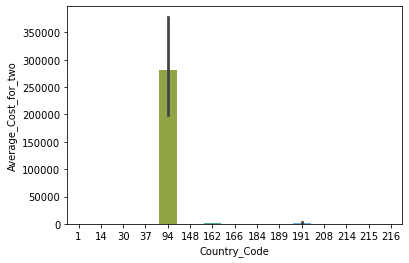

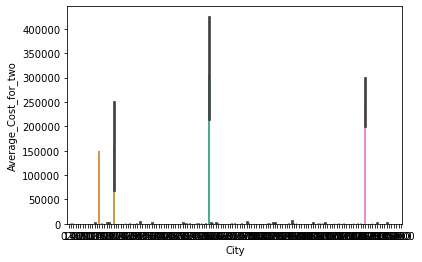

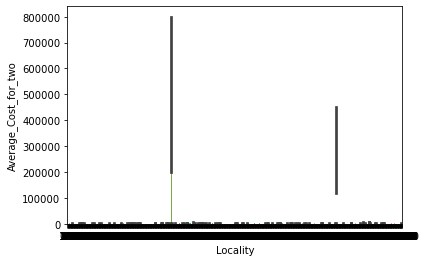

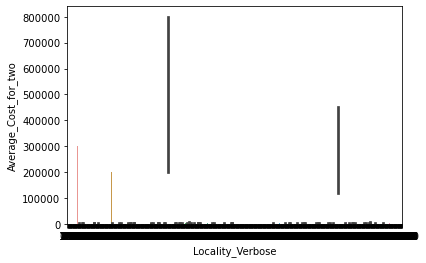

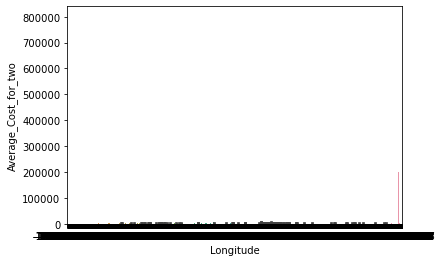

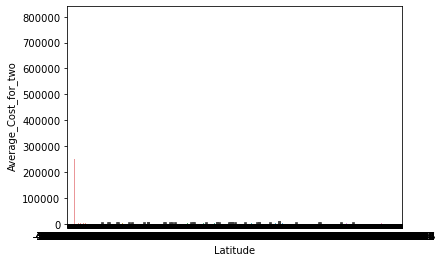

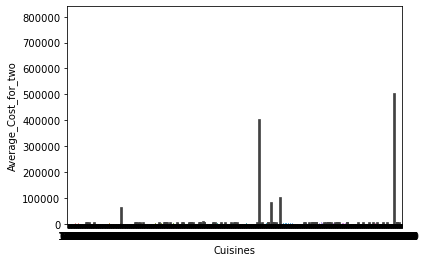

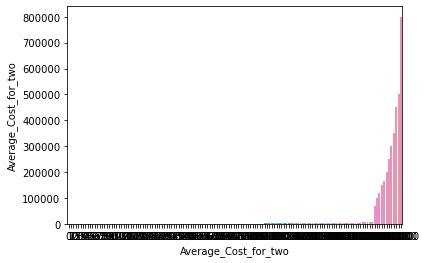

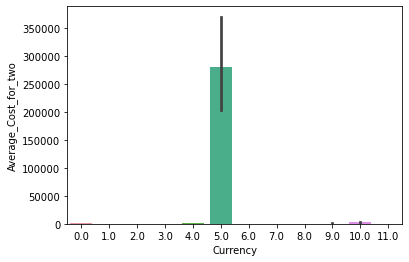

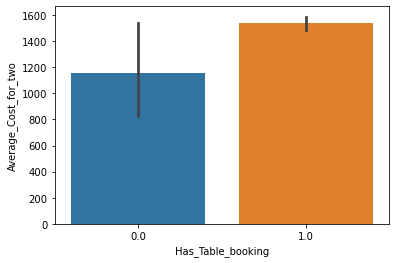

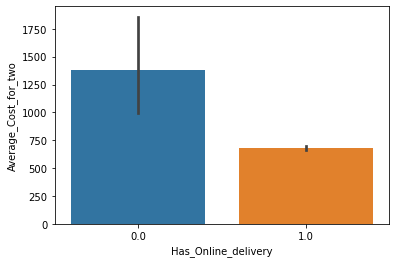

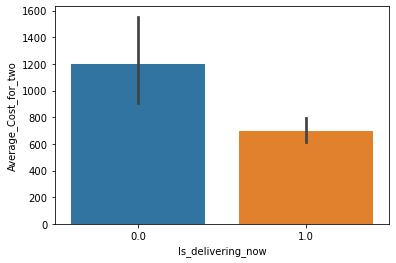

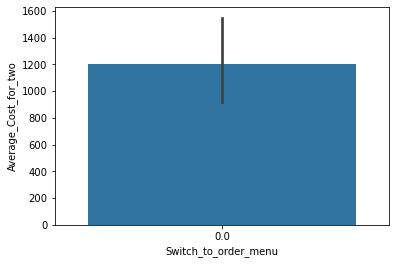

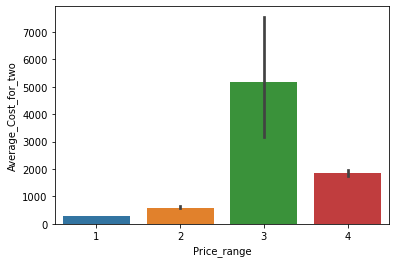

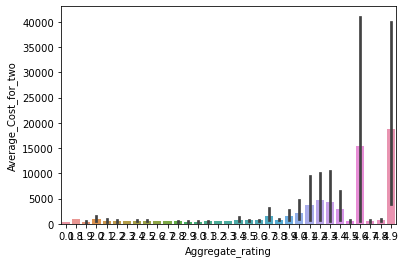

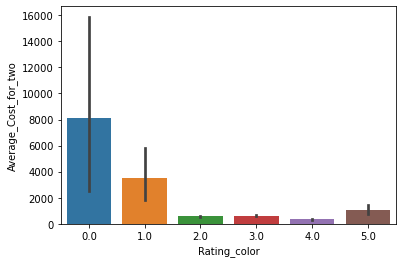

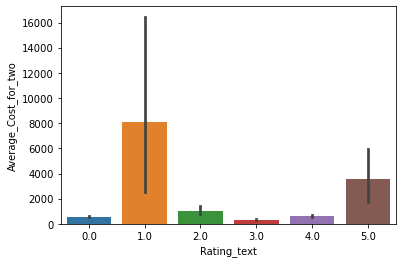

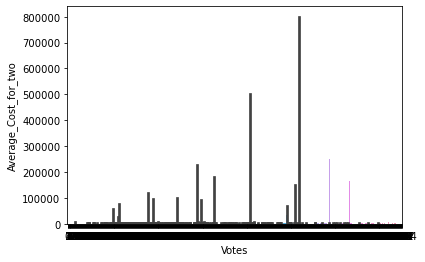

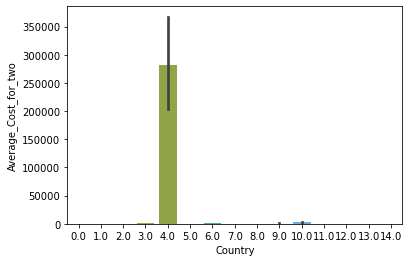

In [36]:
for column in Zomato.columns:
    sns.barplot(x=column,y='Average_Cost_for_two',data=Zomato)
    plt.xlabel(column)
    plt.show()


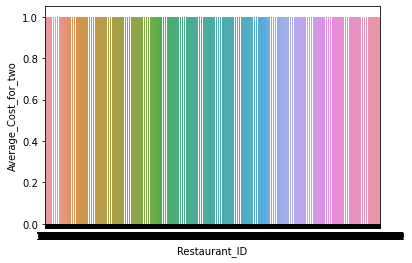

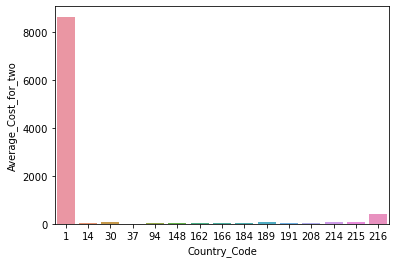

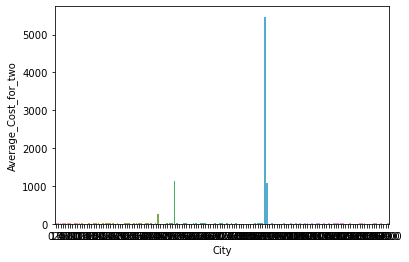

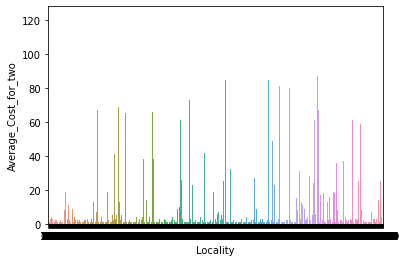

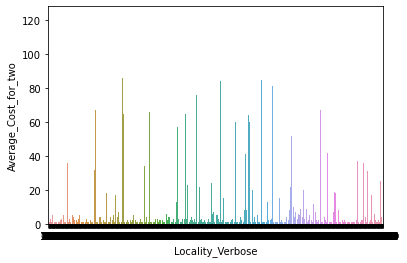

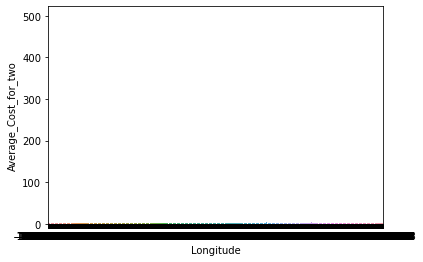

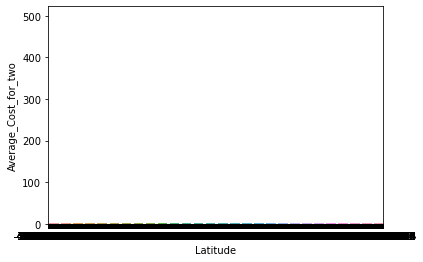

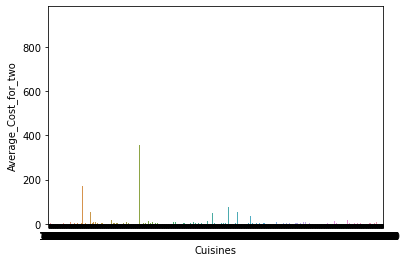

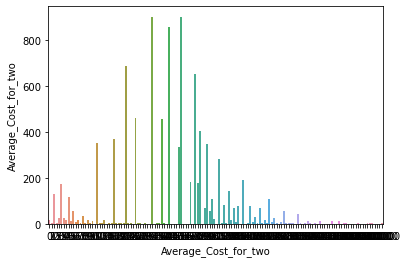

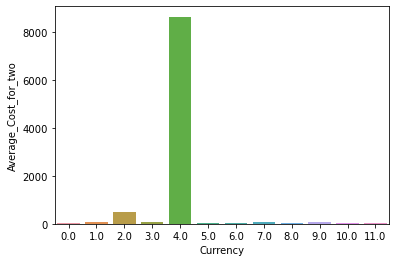

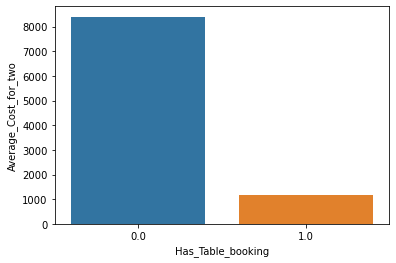

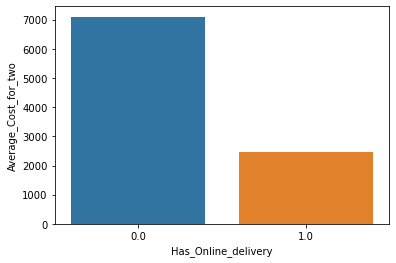

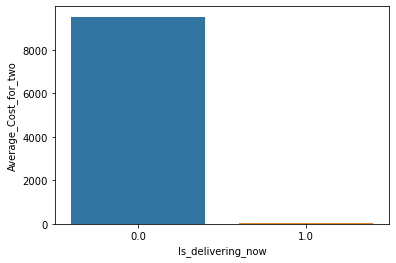

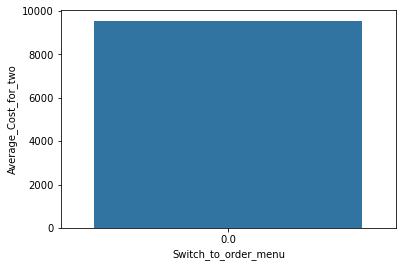

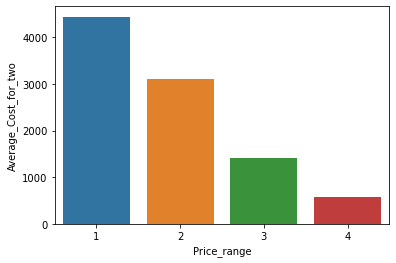

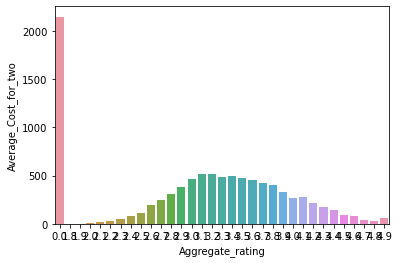

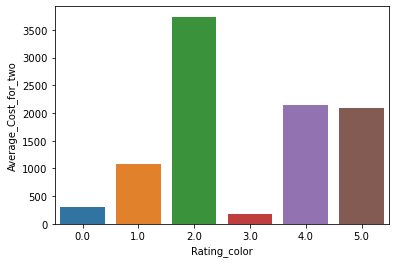

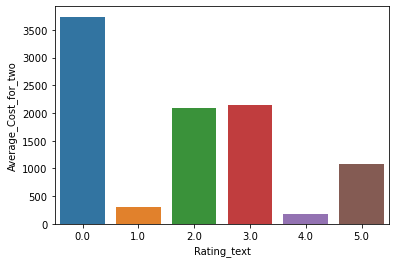

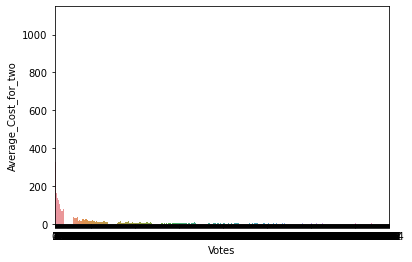

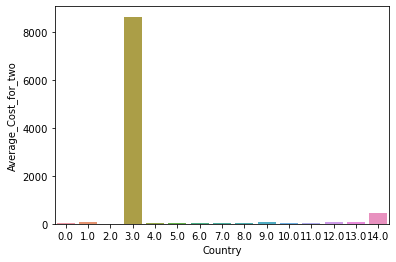

In [37]:
for column in Zomato.columns:
    sns.countplot(x=column, data=Zomato)
    plt.xlabel(column)
    plt.ylabel('Average_Cost_for_two')
    plt.show()

Count and Bar Plot for Price_range

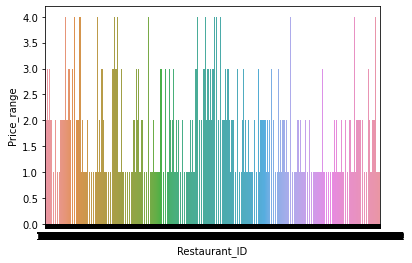

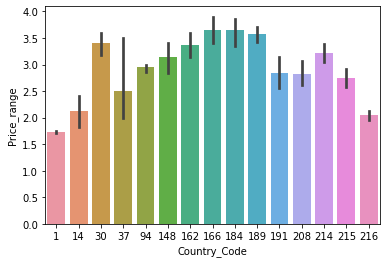

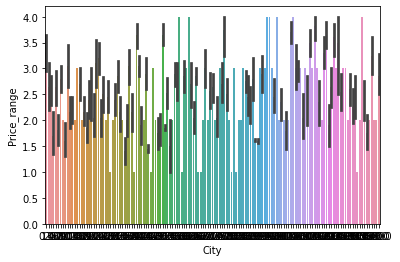

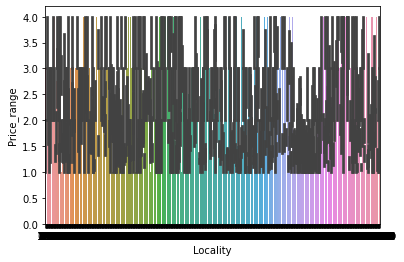

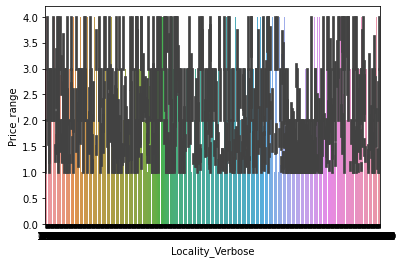

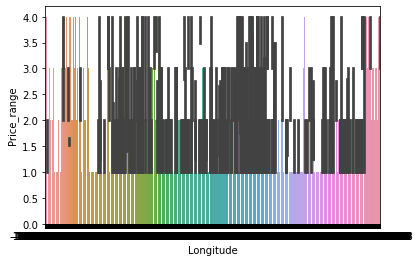

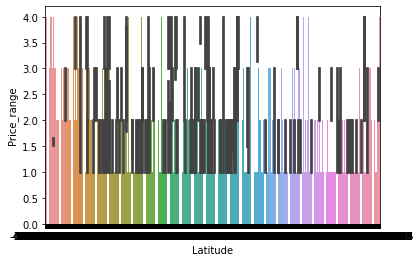

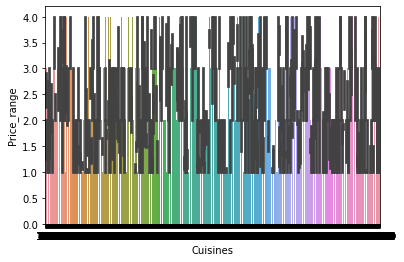

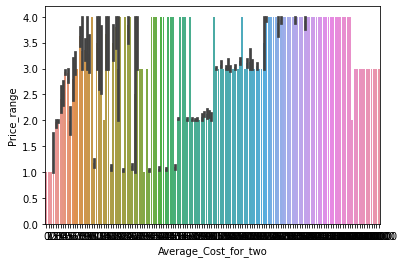

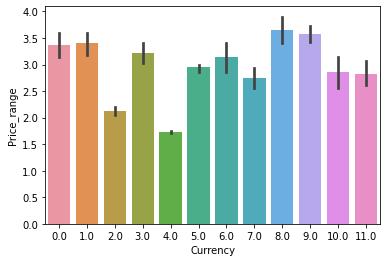

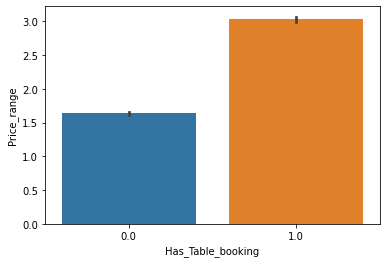

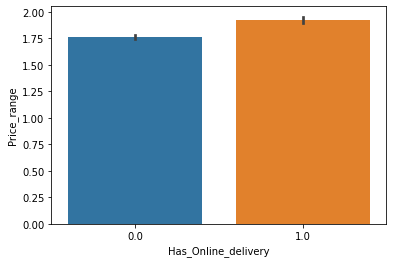

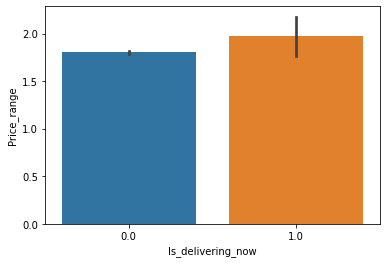

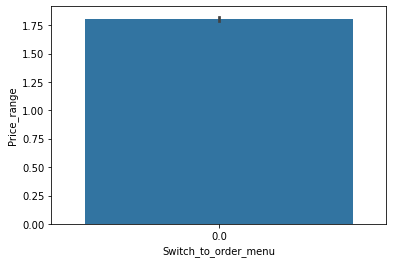

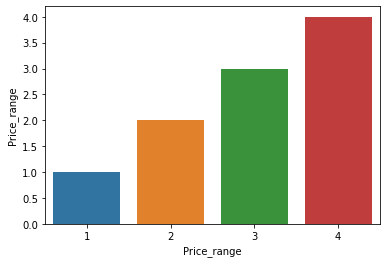

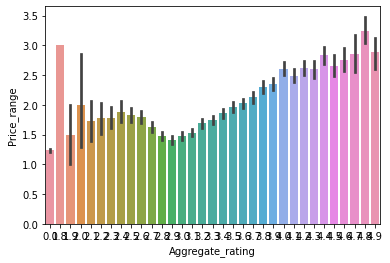

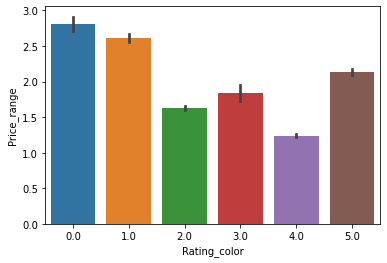

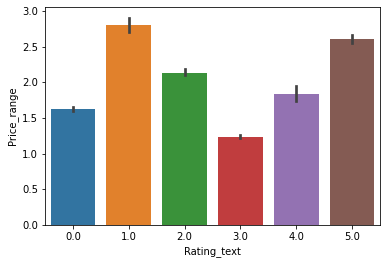

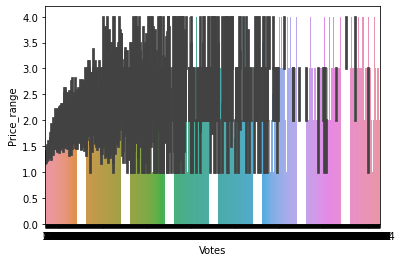

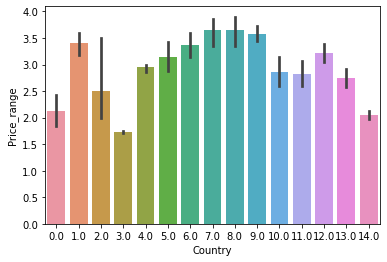

In [38]:
for column in Zomato.columns:
    sns.barplot(x=column,y='Price_range',data=Zomato)
    plt.xlabel(column)
    plt.show()


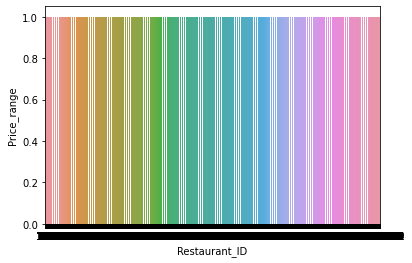

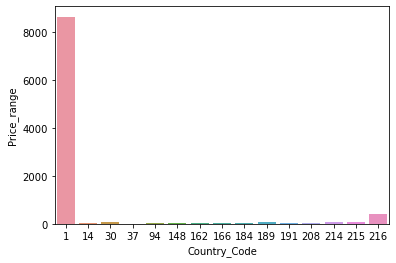

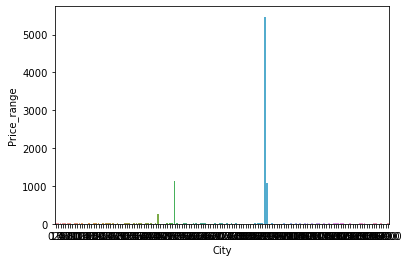

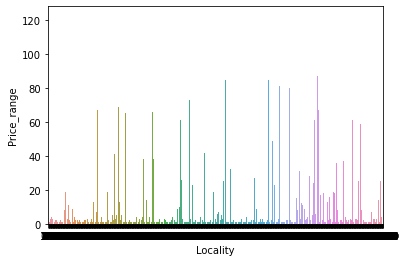

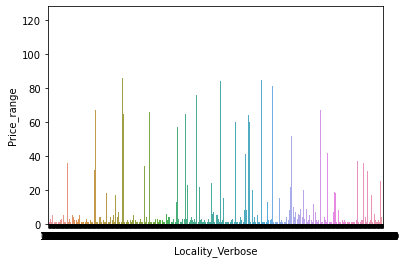

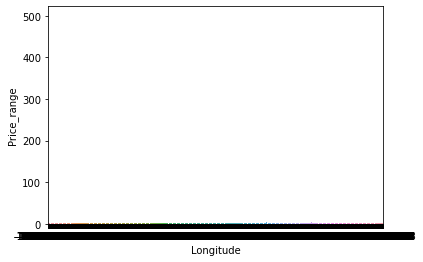

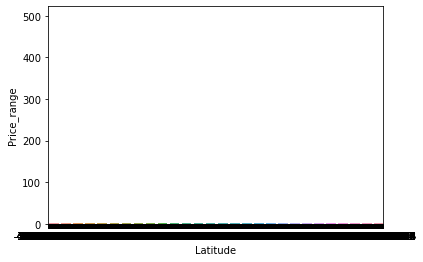

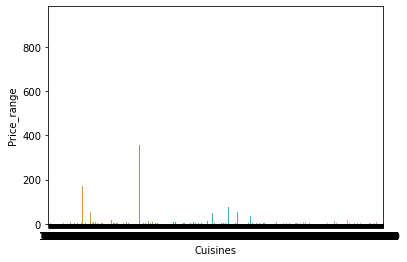

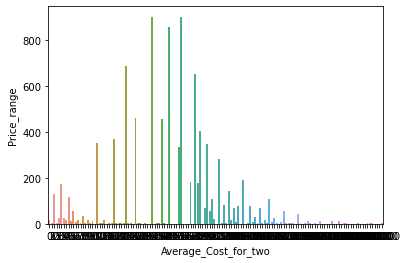

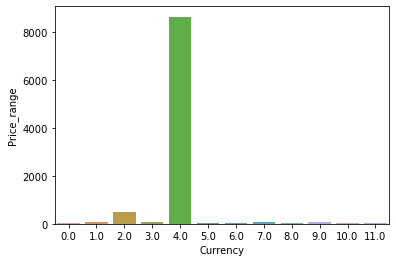

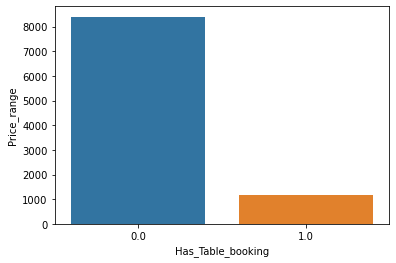

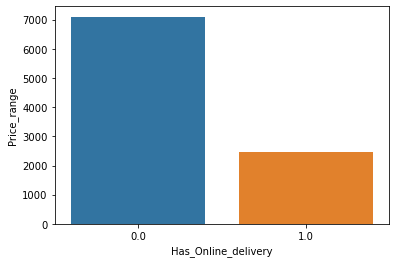

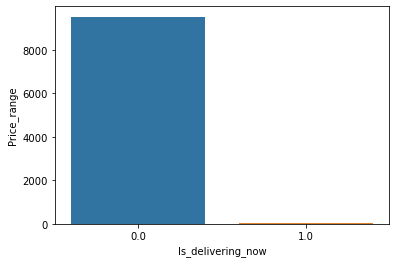

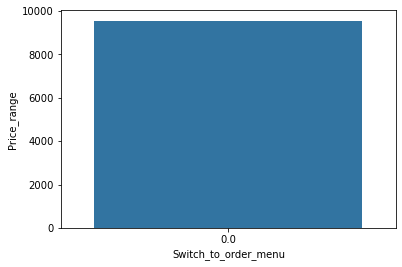

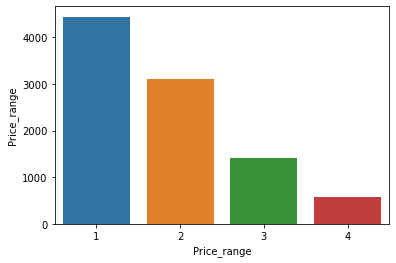

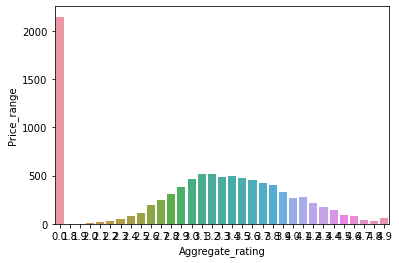

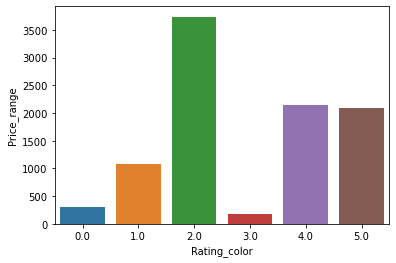

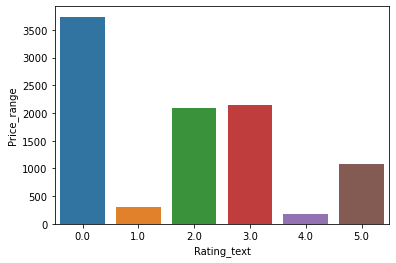

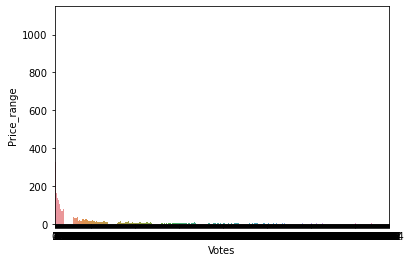

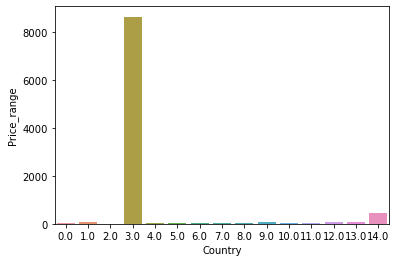

In [39]:
for column in Zomato.columns:
    sns.countplot(x=column, data=Zomato)
    plt.xlabel(column)
    plt.ylabel('Price_range')
    plt.show()

New Delhi have maximum restaurant and Vineland Station have least number of restaurants.

New Delhi has the highest Count of Restaurant in India and the least is Mohali

Online Delivery is very less in India
.
Very less company are delivery now.

Maximum price range is 1.

Rating color Orange in maximum.

Rating Text is maximum Average.

Histogram View 

array([[<AxesSubplot:title={'center':'Restaurant_ID'}>,
        <AxesSubplot:title={'center':'Country_Code'}>,
        <AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Locality'}>],
       [<AxesSubplot:title={'center':'Locality_Verbose'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Cuisines'}>],
       [<AxesSubplot:title={'center':'Average_Cost_for_two'}>,
        <AxesSubplot:title={'center':'Currency'}>,
        <AxesSubplot:title={'center':'Has_Table_booking'}>,
        <AxesSubplot:title={'center':'Has_Online_delivery'}>],
       [<AxesSubplot:title={'center':'Is_delivering_now'}>,
        <AxesSubplot:title={'center':'Switch_to_order_menu'}>,
        <AxesSubplot:title={'center':'Price_range'}>,
        <AxesSubplot:title={'center':'Aggregate_rating'}>],
       [<AxesSubplot:title={'center':'Rating_color'}>,
        <AxesSubplot:title={'center':'Rating_te

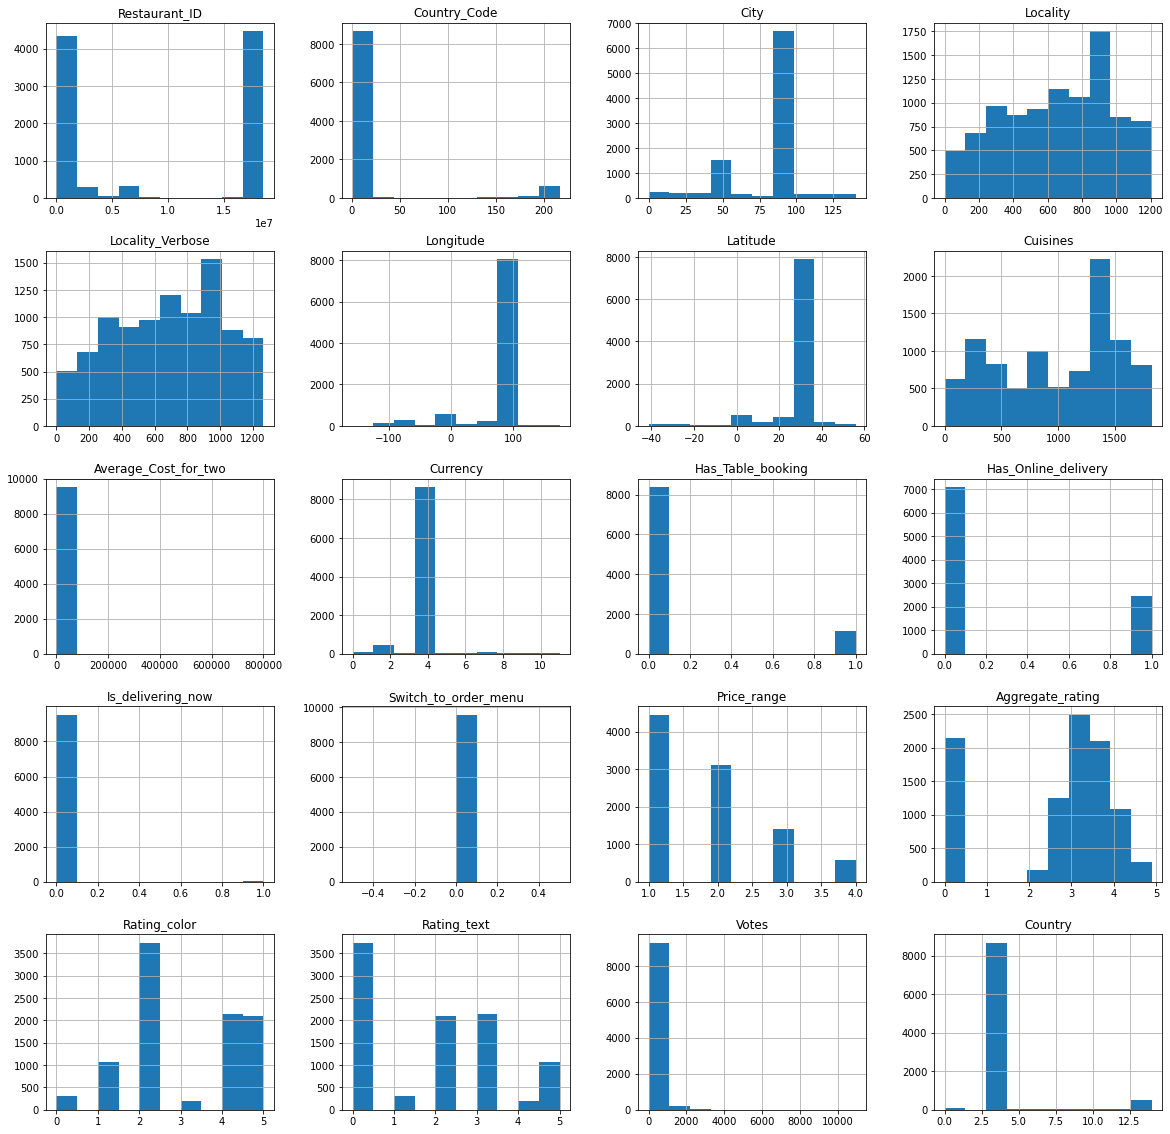

In [40]:
Zomato.hist(bins=10, figsize=(20,20))

We can notice that lot of Skewness is present in the dataset(Right and Left both skewness is present) ,So we will reduce all this skewness later. 

# Bivarate

In [31]:
Zomato.columns

Index(['Restaurant_ID', 'Country_Code', 'City', 'Locality', 'Locality_Verbose',
       'Longitude', 'Latitude', 'Cuisines', 'Average_Cost_for_two', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

Scatter Plot for Average_Cost_for_two

<AxesSubplot:xlabel='Locality', ylabel='Average_Cost_for_two'>

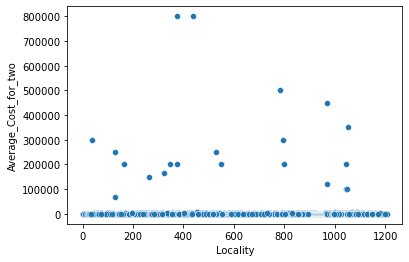

In [42]:
sns.scatterplot(x='Locality',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Locality_Verbose', ylabel='Average_Cost_for_two'>

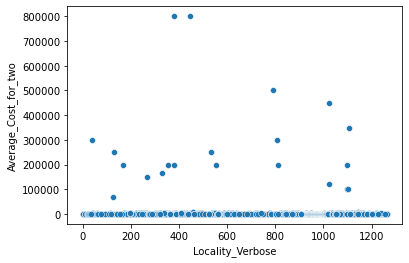

In [43]:
sns.scatterplot(x='Locality_Verbose',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Cuisines', ylabel='Average_Cost_for_two'>

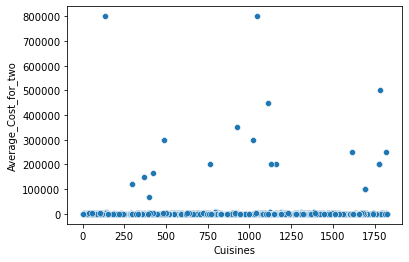

In [44]:
sns.scatterplot(x='Cuisines',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Currency', ylabel='Average_Cost_for_two'>

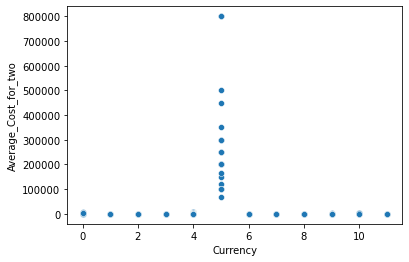

In [45]:
sns.scatterplot(x='Currency',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Has_Table_booking', ylabel='Average_Cost_for_two'>

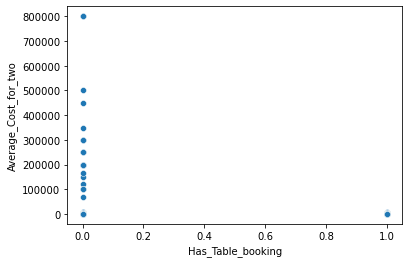

In [46]:
sns.scatterplot(x='Has_Table_booking',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Has_Online_delivery', ylabel='Average_Cost_for_two'>

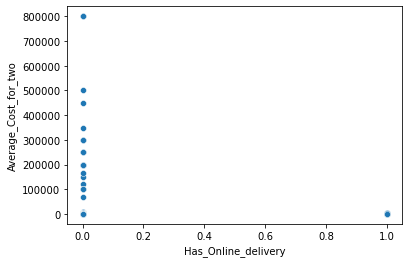

In [47]:
sns.scatterplot(x='Has_Online_delivery',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Is_delivering_now', ylabel='Average_Cost_for_two'>

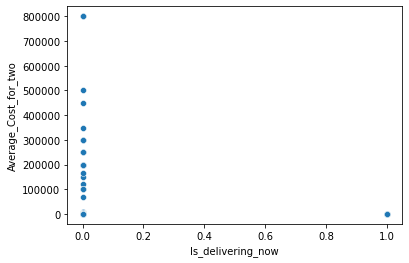

In [48]:
sns.scatterplot(x='Is_delivering_now',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Price_range', ylabel='Average_Cost_for_two'>

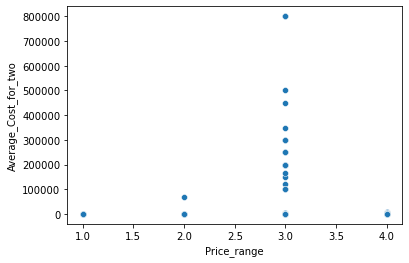

In [49]:
sns.scatterplot(x='Price_range',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Votes', ylabel='Average_Cost_for_two'>

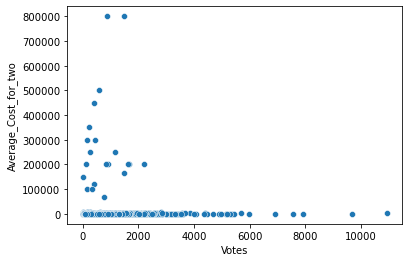

In [50]:
sns.scatterplot(x='Votes',y='Average_Cost_for_two',data=Zomato)

<AxesSubplot:xlabel='Country', ylabel='Average_Cost_for_two'>

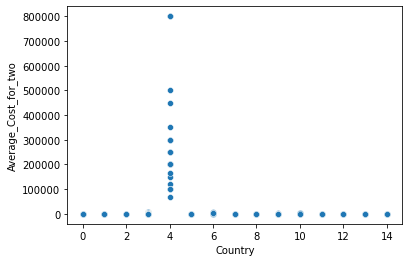

In [51]:
sns.scatterplot(x='Country',y='Average_Cost_for_two',data=Zomato)

Scatter Plot for Price_Range

<AxesSubplot:xlabel='Locality', ylabel='Price_range'>

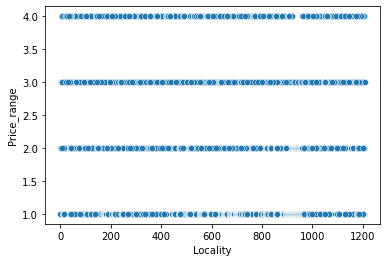

In [52]:
sns.scatterplot(x='Locality',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Locality_Verbose', ylabel='Price_range'>

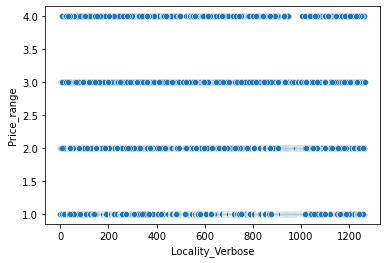

In [53]:
sns.scatterplot(x='Locality_Verbose',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Cuisines', ylabel='Price_range'>

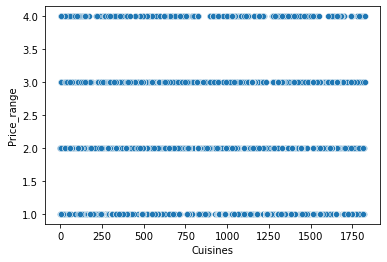

In [54]:
sns.scatterplot(x='Cuisines',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Currency', ylabel='Price_range'>

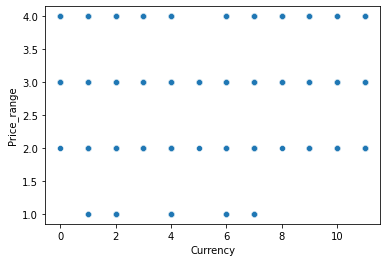

In [55]:
sns.scatterplot(x='Currency',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Has_Table_booking', ylabel='Price_range'>

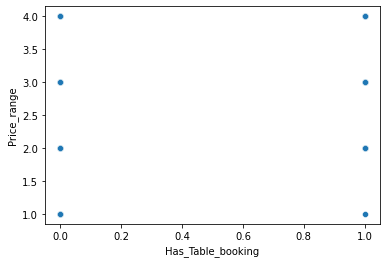

In [56]:
sns.scatterplot(x='Has_Table_booking',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Has_Online_delivery', ylabel='Price_range'>

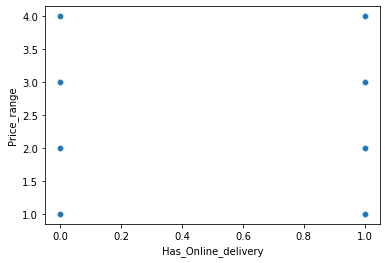

In [57]:
sns.scatterplot(x='Has_Online_delivery',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Is_delivering_now', ylabel='Price_range'>

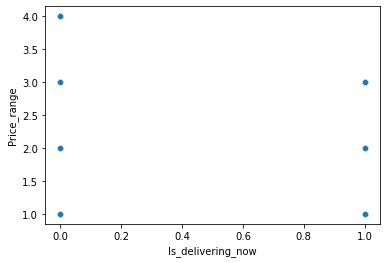

In [58]:
sns.scatterplot(x='Is_delivering_now',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Price_range', ylabel='Price_range'>

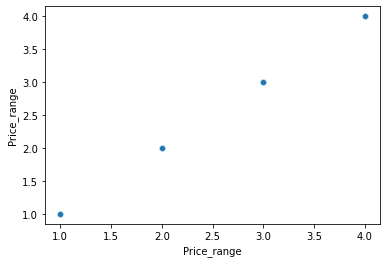

In [59]:
sns.scatterplot(x='Price_range',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Votes', ylabel='Price_range'>

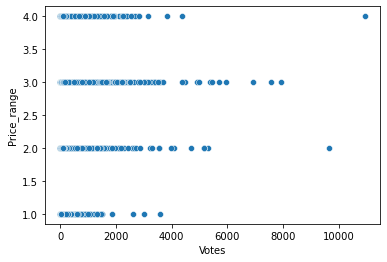

In [60]:
sns.scatterplot(x='Votes',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Country', ylabel='Price_range'>

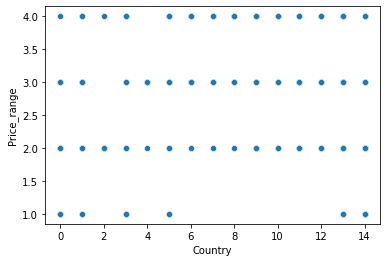

In [61]:
sns.scatterplot(x='Country',y='Price_range',data=Zomato)

<AxesSubplot:xlabel='Locality', ylabel='Density'>

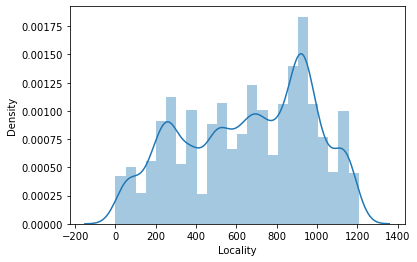

In [62]:
sns.distplot(Zomato['Locality'])

<AxesSubplot:xlabel='Locality_Verbose', ylabel='Density'>

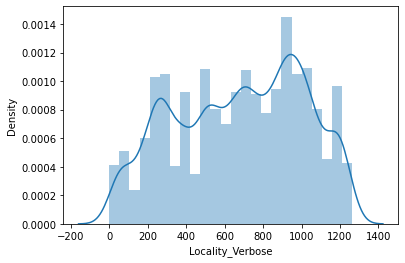

In [63]:
sns.distplot(Zomato['Locality_Verbose'])

<AxesSubplot:xlabel='Cuisines', ylabel='Density'>

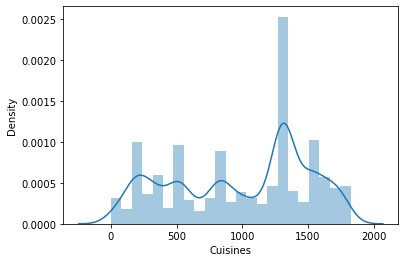

In [64]:
sns.distplot(Zomato['Cuisines'])

<AxesSubplot:xlabel='Currency', ylabel='Density'>

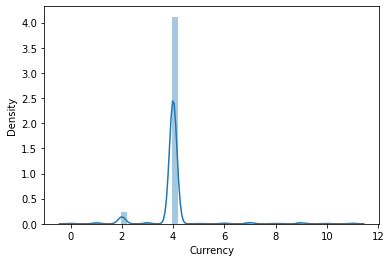

In [65]:
sns.distplot(Zomato['Currency'])

<AxesSubplot:xlabel='Has_Table_booking', ylabel='Density'>

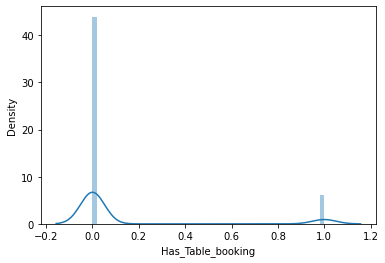

In [66]:
sns.distplot(Zomato['Has_Table_booking'])

<AxesSubplot:xlabel='Has_Online_delivery', ylabel='Density'>

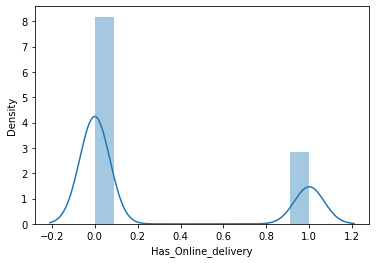

In [67]:
sns.distplot(Zomato['Has_Online_delivery'])

<AxesSubplot:xlabel='Locality', ylabel='Density'>

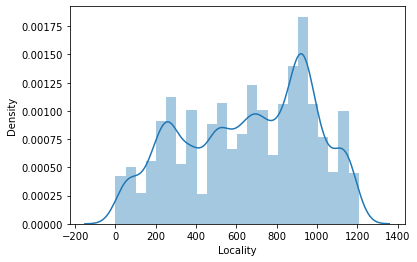

In [68]:
sns.distplot(Zomato['Locality'])

<AxesSubplot:xlabel='Price_range', ylabel='Density'>

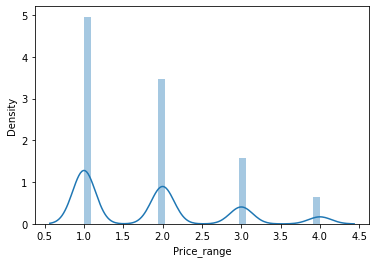

In [69]:
sns.distplot(Zomato['Price_range'])

<AxesSubplot:xlabel='Votes', ylabel='Density'>

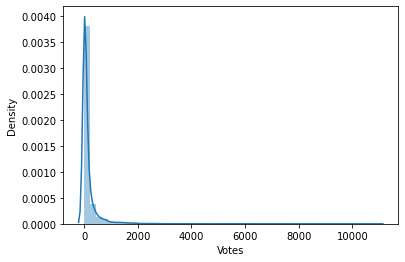

In [70]:
sns.distplot(Zomato['Votes'])

In [ ]:
sns.distplot(Zomato['Country'])

All the graps indicate the relation between each other and can be helpfull in determining the data 

Multivariate Analysis

<Figure size 1800x2160 with 0 Axes>

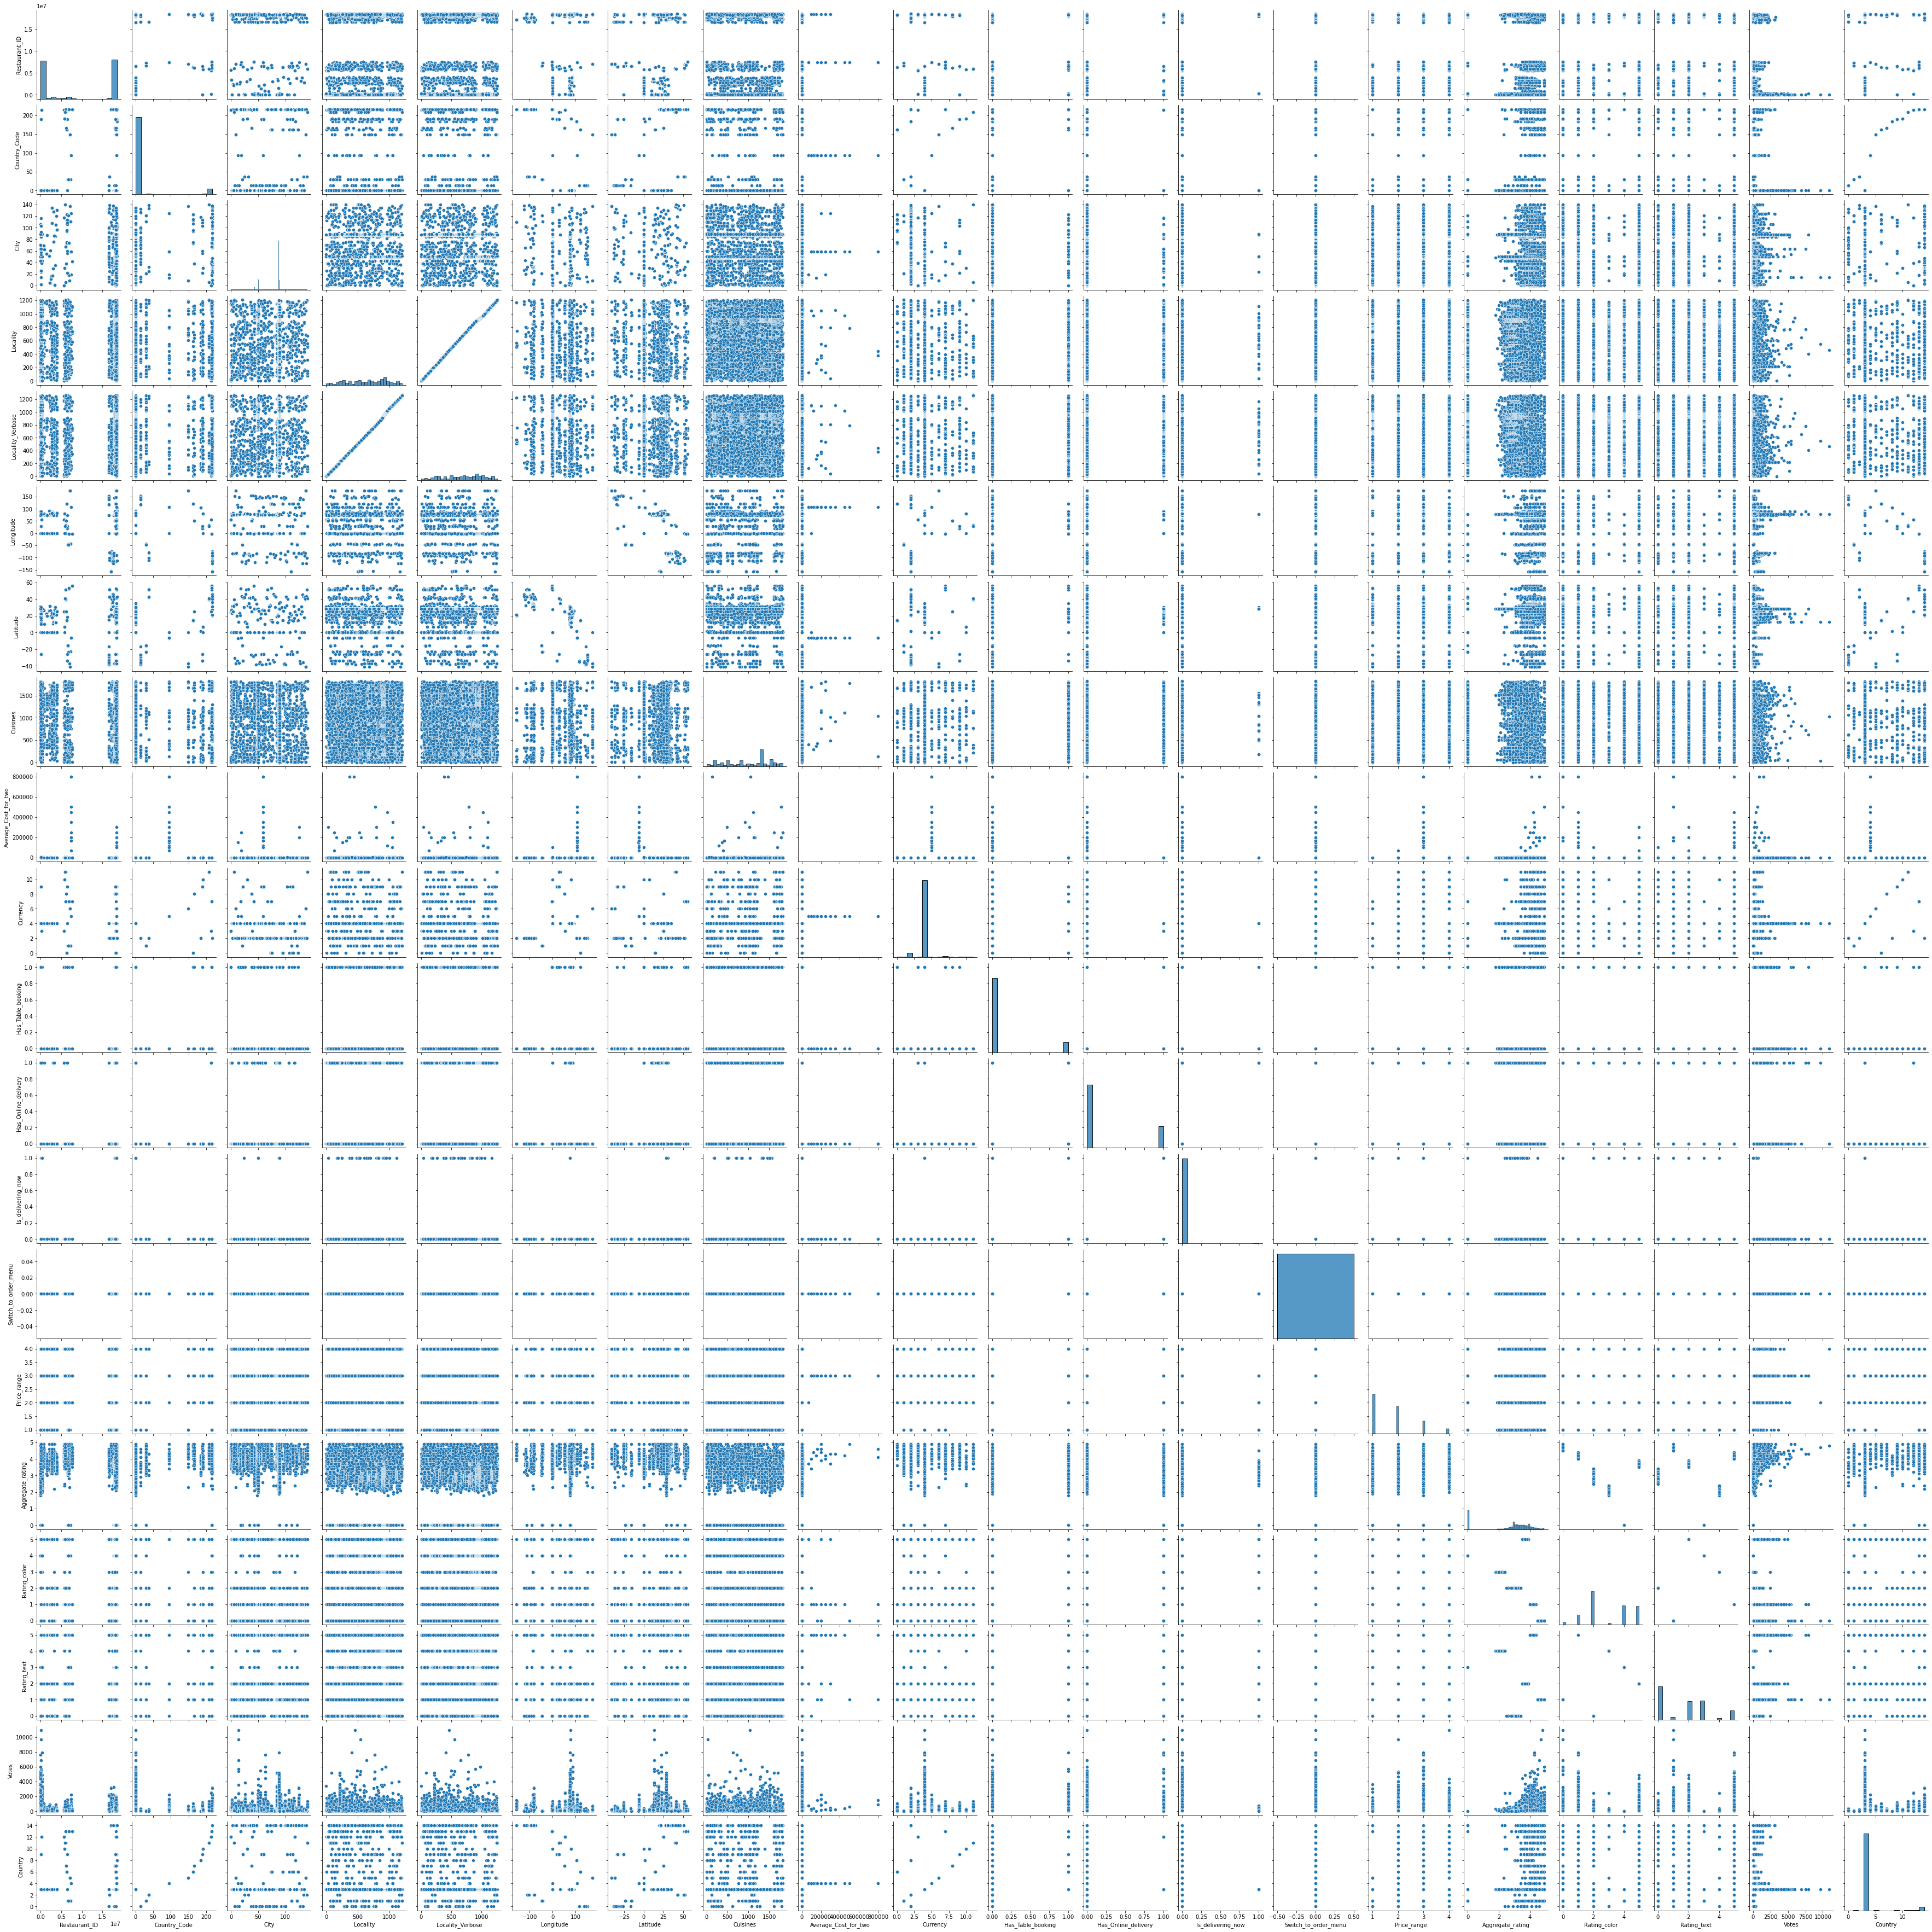

In [72]:
plt.figure(figsize=(25,30))
sns.pairplot(Zomato)
plt.show()

pair plot gives the pairwise relation between the columns which is plotted on the basis of target variables. Here we can observe the relation between the features and label.Most of the features have strong linear relationship and correlation with each other.

Now Lets See that counts of each columns

In [73]:
for i in Zomato.columns:
        print(Zomato[i].value_counts())
        print('*'*100)

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant_ID, Length: 9551, dtype: int64
****************************************************************************************************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country_Code, dtype: int64
****************************************************************************************************
88.0     5473
50.0     1118
89.0     1080
43.0      251
48.0       25
         ... 
93.0        1
78.0        1
77.0        1
71.0        1
133.0       1
Name: City, Length: 141, dtype: int64
****************************************************************************************************
216.0    122
835.0     99
971.0     87
274.0     86
639.0     85
        ... 
587.0      1

Corelation with Target

<AxesSubplot:>

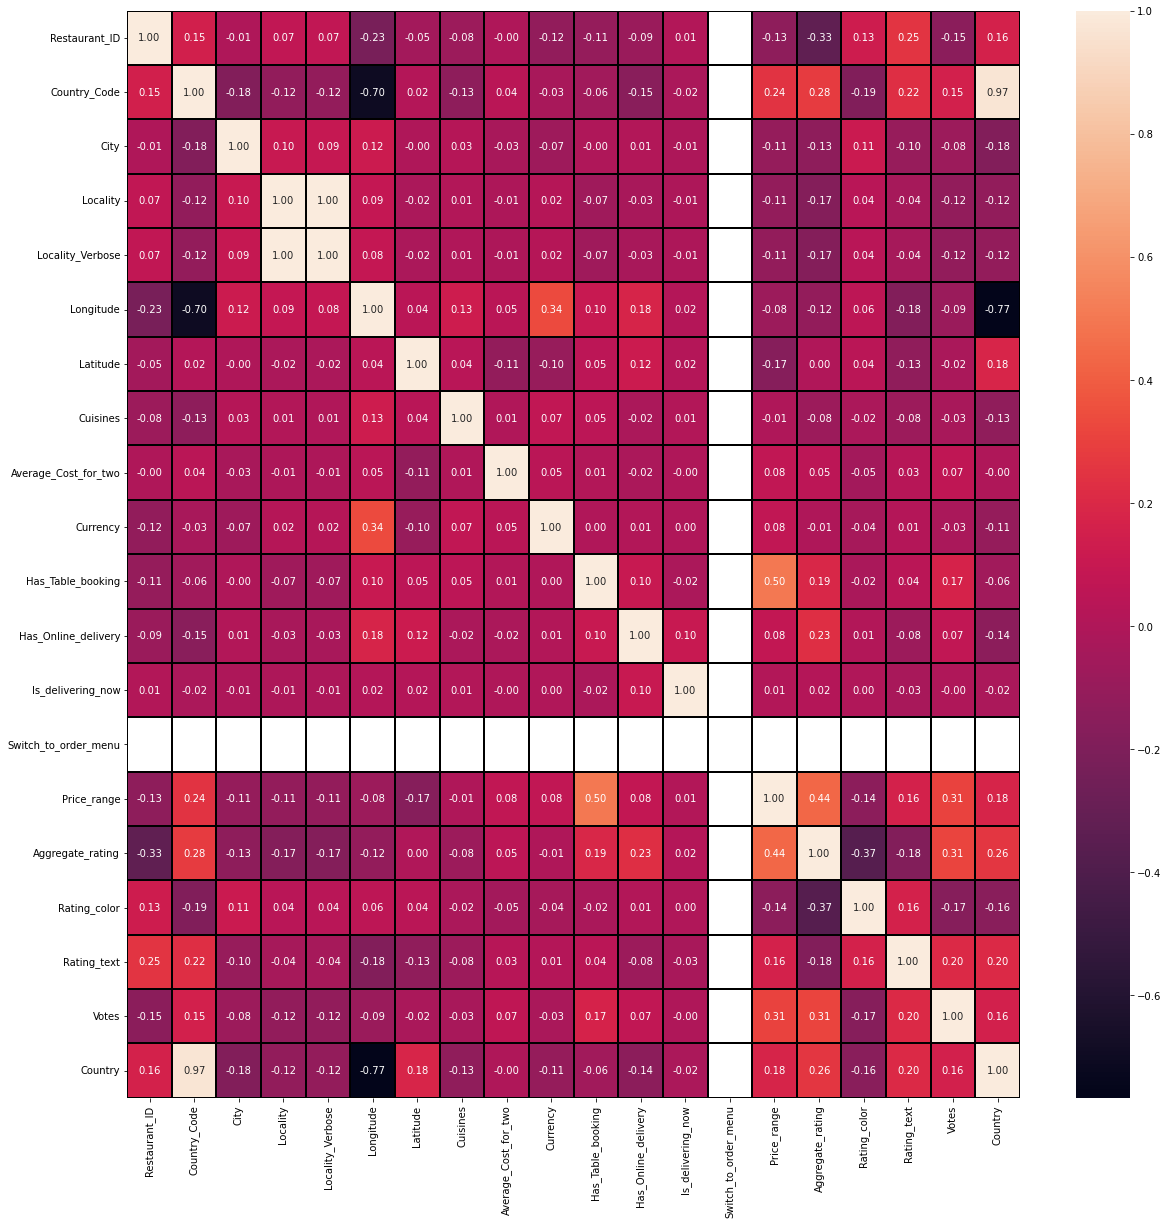

In [32]:
plt.figure(figsize = (20,20))
sns.heatmap(Zomato.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

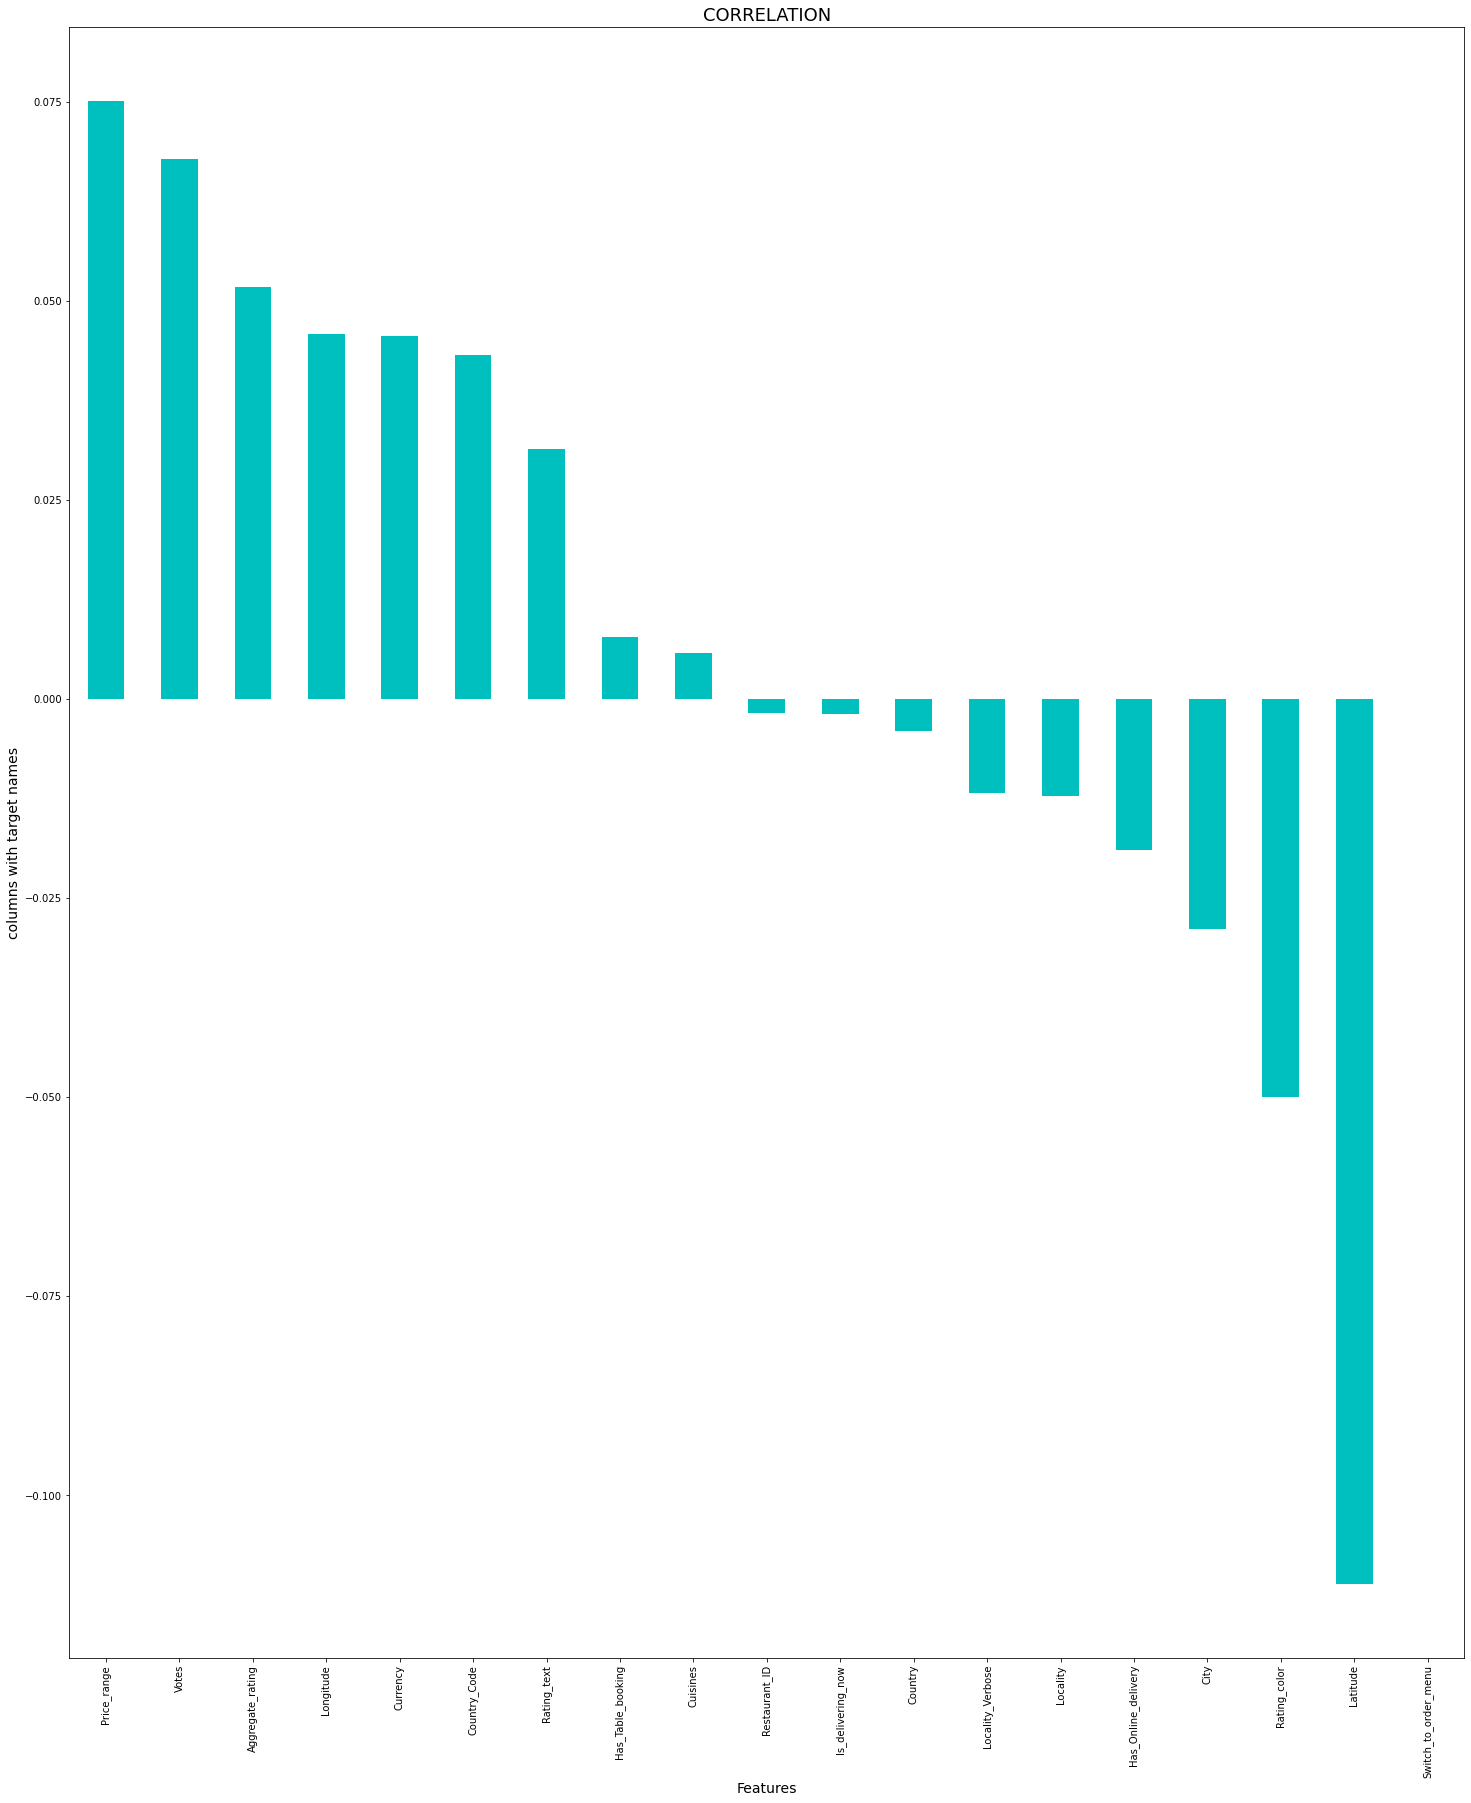

In [33]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Zomato.corr()['Average_Cost_for_two'].sort_values(ascending=False).drop(['Average_Cost_for_two']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [34]:
Zomato.drop(['Latitude','Switch_to_order_menu','Rating_color','Locality','Is_delivering_now','Restaurant_ID'],axis=1,inplace=True)

In [35]:
Zomato

Country_Code   City  Locality_Verbose   Longitude  Cuisines  \
0              162   73.0             172.0  121.027535     920.0   
1              162   73.0             601.0  121.014101    1111.0   
2              162   75.0             314.0  121.056831    1671.0   
3              162   75.0             875.0  121.056475    1126.0   
4              162   75.0             875.0  121.057508    1122.0   
...            ...    ...               ...         ...       ...   
9546           208  140.0             523.0   28.977392    1813.0   
9547           208  140.0             558.0   29.041297    1824.0   
9548           208  140.0             561.0   29.034640    1110.0   
9549           208  140.0             561.0   29.036019    1657.0   
9550           208  140.0             681.0   29.026016     331.0   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
0                     1100       0.0                1.0                  0.0   
1                     1200       0.0                1.0                  0.0   
2                     4000       0.0                1.0                  0.0   
3                     1500       0.0                0.0                  0.0   
4                     1500       0.0                1.0                  0.0   
...                    ...       ...                ...                  ...   
9546                    80      11.0                0.0                  0.0   
9547                   105      11.0                0.0                  0.0   
9548                   170      11.0                0.0                  0.0   
9549                   120      11.0                0.0                  0.0   
9550                    55      11.0                0.0                  0.0   

      Price_range  Aggregate_rating  Rating_text  Votes  Country  
0               3               4.8          1.0    314      6.0  
1               3               4.5          1.0    591      6.0  
2               4               4.4          5.0    270      6.0  
3               4               4.9          1.0    365      6.0  
4               4               4.8          1.0    229      6.0  
...           ...               ...          ...    ...      ...  
9546            3               4.1          5.0    788     11.0  
9547            3               4.2          5.0   1034     11.0  
9548            4               3.7          2.0    661     11.0  
9549            4               4.0          5.0    901     11.0  
9550            2               4.0          5.0    591     11.0  

[9551 rows x 14 columns]

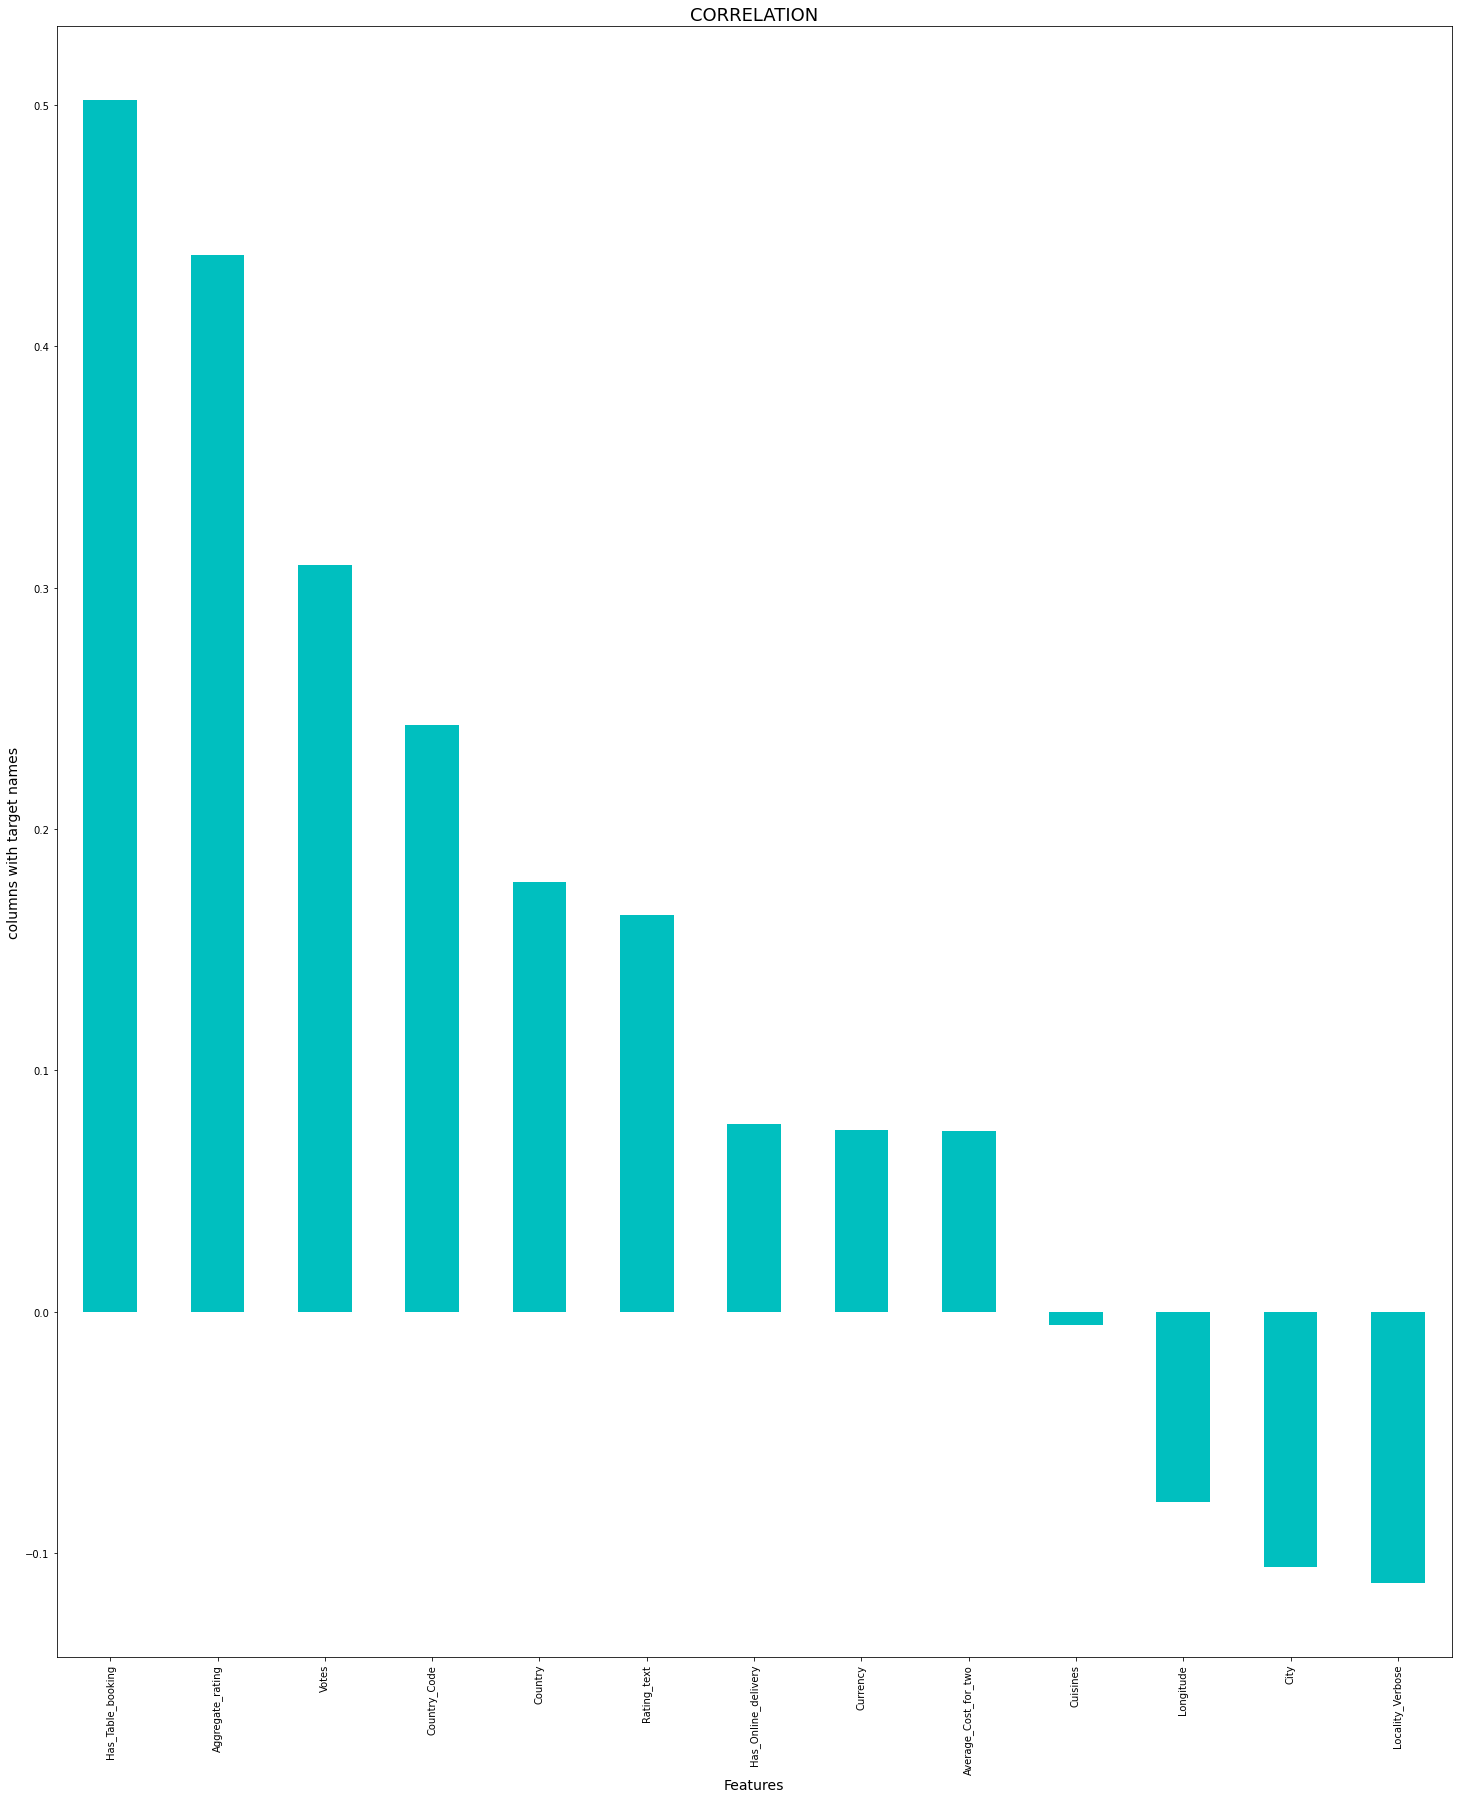

In [36]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Zomato.corr()['Price_range'].sort_values(ascending=False).drop(['Price_range']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

Here  positive correlated columns are upwards and Negative are    Downwards


Now Lets Delete the columns which are Negatively corrlated to target variable

In [37]:
#to analyse the correlation of each column
Zomato.corr()

Country_Code      City  Locality_Verbose  Longitude  \
Country_Code              1.000000 -0.181728         -0.117543  -0.698299   
City                     -0.181728  1.000000          0.093141   0.117391   
Locality_Verbose         -0.117543  0.093141          1.000000   0.084340   
Longitude                -0.698299  0.117391          0.084340   1.000000   
Cuisines                 -0.133514  0.026766          0.006047   0.126863   
Average_Cost_for_two      0.043225 -0.028838         -0.011852   0.045891   
Currency                 -0.033466 -0.071996          0.022960   0.337334   
Has_Table_booking        -0.061682 -0.003762         -0.065132   0.100488   
Has_Online_delivery      -0.154605  0.012723         -0.031766   0.178757   
Price_range               0.243327 -0.105759         -0.112311  -0.078939   
Aggregate_rating          0.282189 -0.132163         -0.173253  -0.116818   
Rating_text               0.222685 -0.098985         -0.035430  -0.181466   
Votes                     0.154530 -0.078406         -0.122877  -0.085101   
Country                   0.968700 -0.180959         -0.116408  -0.766221   

                      Cuisines  Average_Cost_for_two  Currency  \
Country_Code         -0.133514              0.043225 -0.033466   
City                  0.026766             -0.028838 -0.071996   
Locality_Verbose      0.006047             -0.011852  0.022960   
Longitude             0.126863              0.045891  0.337334   
Cuisines              1.000000              0.005844  0.069291   
Average_Cost_for_two  0.005844              1.000000  0.045615   
Currency              0.069291              0.045615  1.000000   
Has_Table_booking     0.050707              0.007758  0.000640   
Has_Online_delivery  -0.016539             -0.018974  0.006991   
Price_range          -0.005324              0.075083  0.075179   
Aggregate_rating     -0.080475              0.051792 -0.006939   
Rating_text          -0.079963              0.031439  0.014598   
Votes                -0.032780              0.067783 -0.027111   
Country              -0.128633             -0.004034 -0.105296   

                      Has_Table_booking  Has_Online_delivery  Price_range  \
Country_Code                  -0.061682            -0.154605     0.243327   
City                          -0.003762             0.012723    -0.105759   
Locality_Verbose              -0.065132            -0.031766    -0.112311   
Longitude                      0.100488             0.178757    -0.078939   
Cuisines                       0.050707            -0.016539    -0.005324   
Average_Cost_for_two           0.007758            -0.018974     0.075083   
Currency                       0.000640             0.006991     0.075179   
Has_Table_booking              1.000000             0.101224     0.501925   
Has_Online_delivery            0.101224             1.000000     0.077918   
Price_range                    0.501925             0.077918     1.000000   
Aggregate_rating               0.189998             0.225699     0.437944   
Rating_text                    0.044043            -0.080937     0.164242   
Votes                          0.169422             0.074303     0.309444   
Country                       -0.062076            -0.140464     0.178035   

                      Aggregate_rating  Rating_text     Votes   Country  
Country_Code                  0.282189     0.222685  0.154530  0.968700  
City                         -0.132163    -0.098985 -0.078406 -0.180959  
Locality_Verbose             -0.173253    -0.035430 -0.122877 -0.116408  
Longitude                    -0.116818    -0.181466 -0.085101 -0.766221  
Cuisines                     -0.080475    -0.079963 -0.032780 -0.128633  
Average_Cost_for_two          0.051792     0.031439  0.067783 -0.004034  
Currency                     -0.006939     0.014598 -0.027111 -0.105296  
Has_Table_booking             0.189998     0.044043  0.169422 -0.062076  
Has_Online_delivery           0.225699    -0.080937  

In [38]:
Zomato

Country_Code   City  Locality_Verbose   Longitude  Cuisines  \
0              162   73.0             172.0  121.027535     920.0   
1              162   73.0             601.0  121.014101    1111.0   
2              162   75.0             314.0  121.056831    1671.0   
3              162   75.0             875.0  121.056475    1126.0   
4              162   75.0             875.0  121.057508    1122.0   
...            ...    ...               ...         ...       ...   
9546           208  140.0             523.0   28.977392    1813.0   
9547           208  140.0             558.0   29.041297    1824.0   
9548           208  140.0             561.0   29.034640    1110.0   
9549           208  140.0             561.0   29.036019    1657.0   
9550           208  140.0             681.0   29.026016     331.0   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
0                     1100       0.0                1.0                  0.0   
1                     1200       0.0                1.0                  0.0   
2                     4000       0.0                1.0                  0.0   
3                     1500       0.0                0.0                  0.0   
4                     1500       0.0                1.0                  0.0   
...                    ...       ...                ...                  ...   
9546                    80      11.0                0.0                  0.0   
9547                   105      11.0                0.0                  0.0   
9548                   170      11.0                0.0                  0.0   
9549                   120      11.0                0.0                  0.0   
9550                    55      11.0                0.0                  0.0   

      Price_range  Aggregate_rating  Rating_text  Votes  Country  
0               3               4.8          1.0    314      6.0  
1               3               4.5          1.0    591      6.0  
2               4               4.4          5.0    270      6.0  
3               4               4.9          1.0    365      6.0  
4               4               4.8          1.0    229      6.0  
...           ...               ...          ...    ...      ...  
9546            3               4.1          5.0    788     11.0  
9547            3               4.2          5.0   1034     11.0  
9548            4               3.7          2.0    661     11.0  
9549            4               4.0          5.0    901     11.0  
9550            2               4.0          5.0    591     11.0  

[9551 rows x 14 columns]

In [39]:
Zomato.corr()['Average_Cost_for_two'].sort_values()

City                   -0.028838
Has_Online_delivery    -0.018974
Locality_Verbose       -0.011852
Country                -0.004034
Cuisines                0.005844
Has_Table_booking       0.007758
Rating_text             0.031439
Country_Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate_rating        0.051792
Votes                   0.067783
Price_range             0.075083
Average_Cost_for_two    1.000000
Name: Average_Cost_for_two, dtype: float64

In [40]:
Zomato.corr()['Price_range'].sort_values()

Locality_Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Cuisines               -0.005324
Average_Cost_for_two    0.075083
Currency                0.075179
Has_Online_delivery     0.077918
Rating_text             0.164242
Country                 0.178035
Country_Code            0.243327
Votes                   0.309444
Aggregate_rating        0.437944
Has_Table_booking       0.501925
Price_range             1.000000
Name: Price_range, dtype: float64

# DESCRIPTIVE STATSTICS

In [41]:
Zomato.describe().T

count         mean           std         min  \
Country_Code          9551.0    18.365616     56.750546    1.000000   
City                  9551.0    78.301434     23.198915    0.000000   
Locality_Verbose      9551.0   677.305204    331.727817    0.000000   
Longitude             9551.0    64.126574     41.467058 -157.948486   
Cuisines              9551.0   989.373155    514.129660    0.000000   
Average_Cost_for_two  9551.0  1199.210763  16121.183073    0.000000   
Currency              9551.0     3.977699      0.914242    0.000000   
Has_Table_booking     9551.0     0.121244      0.326428    0.000000   
Has_Online_delivery   9551.0     0.256622      0.436792    0.000000   
Price_range           9551.0     1.804837      0.905609    1.000000   
Aggregate_rating      9551.0     2.666370      1.516378    0.000000   
Rating_text           9551.0     1.788713      1.694637    0.000000   
Votes                 9551.0   156.909748    430.169145    0.000000   
Country               9551.0     3.736781      2.651963    0.000000   

                             25%          50%          75%            max  
Country_Code            1.000000     1.000000     1.000000     216.000000  
City                   76.000000    88.000000    88.000000     140.000000  
Locality_Verbose      387.000000   707.000000   953.000000    1264.000000  
Longitude              77.081343    77.191964    77.282006     174.832089  
Cuisines              497.000000  1127.000000  1353.500000    1824.000000  
Average_Cost_for_two  250.000000   400.000000   700.000000  800000.000000  
Currency                4.000000     4.000000     4.000000      11.000000  
Has_Table_booking       0.000000     0.000000     0.000000       1.000000  
Has_Online_delivery     0.000000     0.000000     1.000000       1.000000  
Price_range             1.000000     2.000000     2.000000       4.000000  
Aggregate_rating        2.500000     3.200000     3.700000       4.900000  
Rating_text             0.000000     2.000000     3.000000       5.000000  
Votes                   5.000000    31.000000   131.000000   10934.000000  
Country                 3.000000     3.000000     3.000000      14.000000

*Its Clearly shown above that all the columns have the count value of 18249 there are no negative values in the dataset and Few columns have very low values in it, where few have very high values in the datset.

<AxesSubplot:>

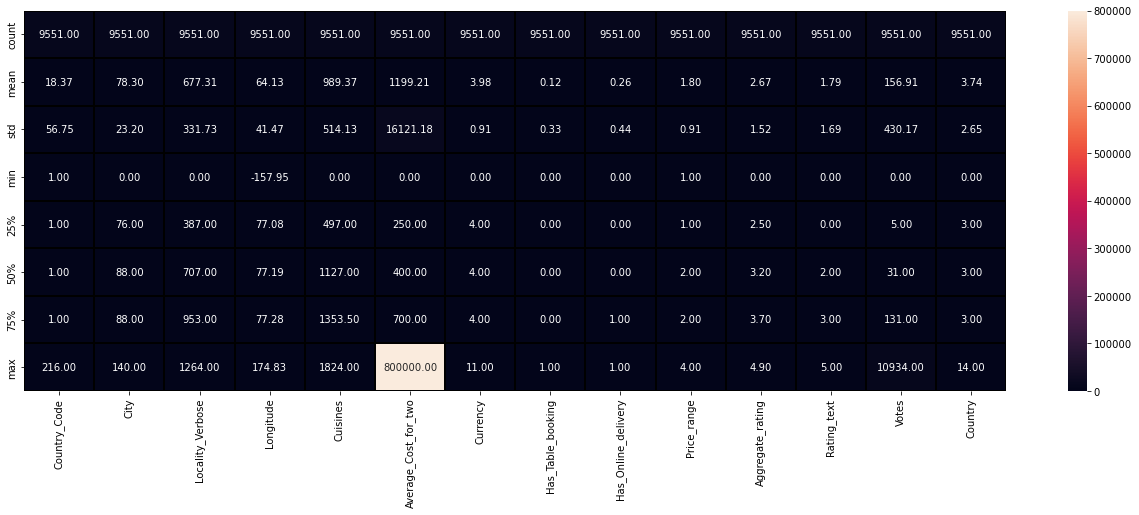

In [42]:
plt.figure(figsize = (22,7))
sns.heatmap(Zomato.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column



In [43]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country_Code          9551 non-null   int64  
 1   City                  9551 non-null   float64
 2   Locality_Verbose      9551 non-null   float64
 3   Longitude             9551 non-null   float64
 4   Cuisines              9551 non-null   float64
 5   Average_Cost_for_two  9551 non-null   int64  
 6   Currency              9551 non-null   float64
 7   Has_Table_booking     9551 non-null   float64
 8   Has_Online_delivery   9551 non-null   float64
 9   Price_range           9551 non-null   int64  
 10  Aggregate_rating      9551 non-null   float64
 11  Rating_text           9551 non-null   float64
 12  Votes                 9551 non-null   int64  
 13  Country               9551 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 1.3 MB


OUTLIERS CHECKING(Any One outlier method can be  used)

In [44]:
colmlist=Zomato.columns.values
ncol=30
nrows=14

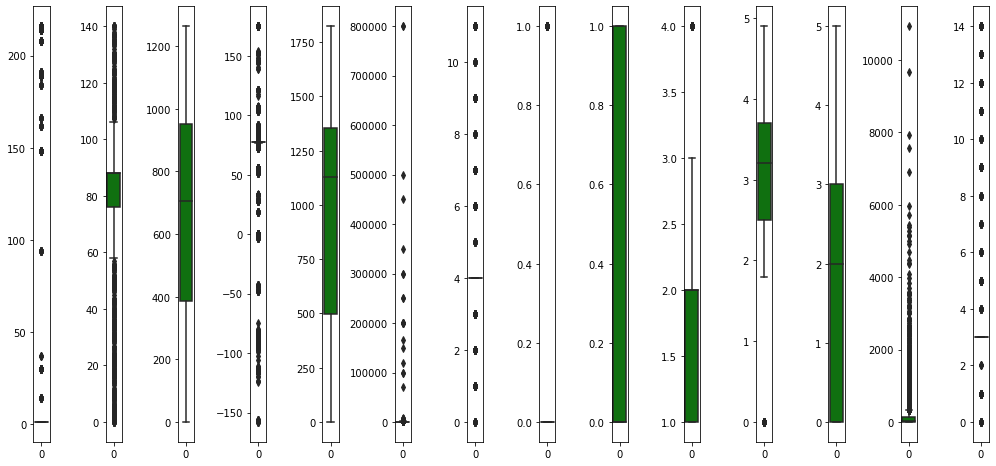

In [45]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Zomato[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

Country_Code               AxesSubplot(0.125,0.125;0.0466867x0.755)
City                    AxesSubplot(0.181024,0.125;0.0466867x0.755)
Locality_Verbose        AxesSubplot(0.237048,0.125;0.0466867x0.755)
Longitude               AxesSubplot(0.293072,0.125;0.0466867x0.755)
Cuisines                AxesSubplot(0.349096,0.125;0.0466867x0.755)
Average_Cost_for_two     AxesSubplot(0.40512,0.125;0.0466867x0.755)
Currency                AxesSubplot(0.461145,0.125;0.0466867x0.755)
Has_Table_booking       AxesSubplot(0.517169,0.125;0.0466867x0.755)
Has_Online_delivery     AxesSubplot(0.573193,0.125;0.0466867x0.755)
Price_range             AxesSubplot(0.629217,0.125;0.0466867x0.755)
Aggregate_rating        AxesSubplot(0.685241,0.125;0.0466867x0.755)
Rating_text             AxesSubplot(0.741265,0.125;0.0466867x0.755)
Votes                   AxesSubplot(0.797289,0.125;0.0466867x0.755)
Country                 AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

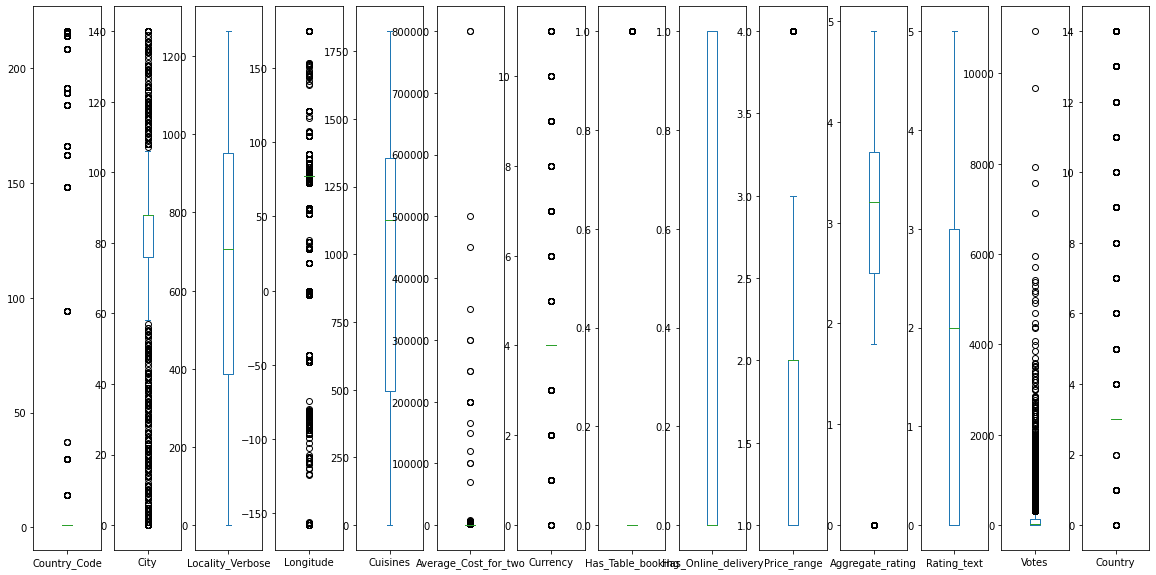

In [46]:
# to find out outliers in the dataset
Zomato.plot(kind='box',subplots=True,figsize=(20,10))

We can see that the Outliers are present in the columns R,ERA,SHO,SV and E ...we have to treat this Outliers ..

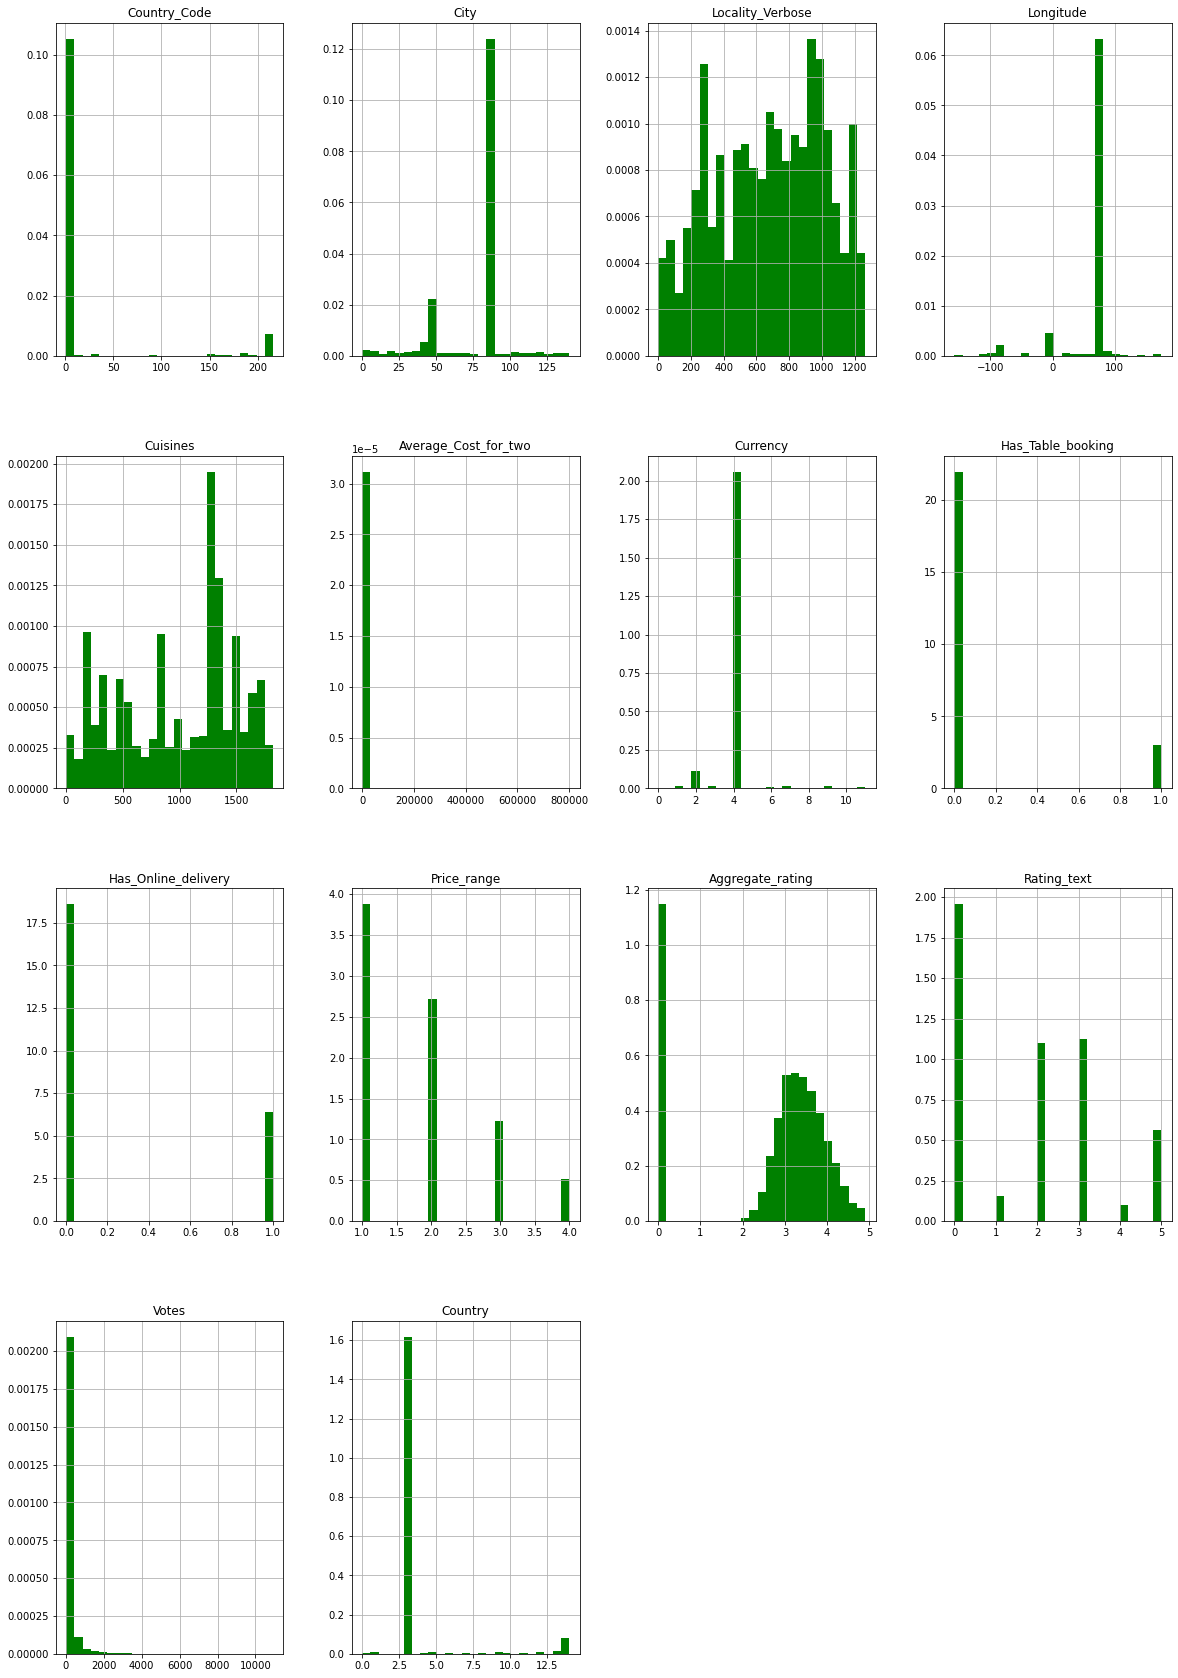

In [47]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,30)
Zomato.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see maximum data is not  normally distributed rest all are skewed or unbalanced data
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

Now Lets Remove Outliers Now

In [48]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Zomato)) < 3).all()

Country_Code            False
City                    False
Locality_Verbose         True
Longitude               False
Cuisines                 True
Average_Cost_for_two    False
Currency                False
Has_Table_booking        True
Has_Online_delivery      True
Price_range              True
Aggregate_rating         True
Rating_text              True
Votes                   False
Country                 False
dtype: bool

In [49]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Zomato))
z.shape

(9551, 14)

In [51]:
threshold = 3
print(np.where(z>3))

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64), array([6, 6, 6, ..., 6, 0, 6], dtype=int64))


In [52]:
Zomato_new=Zomato[(z<3).all(axis=1)]
print(Zomato_new.shape)

(8504, 14)


In [53]:
Zomato.shape

(9551, 14)

In [54]:
Zomato_new.shape

(8504, 14)

In [55]:
print ("Old DataFrame =",Zomato.shape)
print ("New DataFrame =",Zomato_new.shape)
print ("Total dropped rows = ",Zomato.shape[0] - Zomato_new.shape[0])

Old DataFrame = (9551, 14)
New DataFrame = (8504, 14)
Total dropped rows =  1047


In [56]:
#to find % loss in data
loss = (9551-8504)/9551* 100
print(loss)

10.96220291068998


In [57]:
Zomato_new

Country_Code   City  Locality_Verbose   Longitude  Cuisines  \
143             14   12.0              94.0  115.984492    1270.0   
144             14   15.0             112.0  146.685852    1619.0   
269             14   37.0             288.0  153.137401     620.0   
290             14   41.0             308.0  153.593331     331.0   
292             14   45.0             334.0  152.877147    1793.0   
...            ...    ...               ...         ...       ...   
9332           148  137.0            1101.0  174.774912     331.0   
9333           148  137.0            1101.0  174.775005    1195.0   
9334           148  137.0            1234.0  174.779224    1113.0   
9335           148  137.0            1234.0  174.777465     791.0   
9336           148  137.0            1234.0  174.779167    1685.0   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
143                     20       2.0                0.0                  0.0   
144                     20       2.0                0.0                  0.0   
269                      7       2.0                0.0                  0.0   
290                     20       2.0                0.0                  0.0   
292                     30       2.0                0.0                  0.0   
...                    ...       ...                ...                  ...   
9332                    40       6.0                0.0                  0.0   
9333                    80       6.0                0.0                  0.0   
9334                    70       6.0                0.0                  0.0   
9335                   110       6.0                0.0                  0.0   
9336                    90       6.0                0.0                  0.0   

      Price_range  Aggregate_rating  Rating_text  Votes  Country  
143             2               3.2          0.0     21      0.0  
144             2               4.6          1.0    237      0.0  
269             1               3.6          2.0     29      0.0  
290             2               4.1          5.0     56      0.0  
292             3               3.5          2.0     37      0.0  
...           ...               ...          ...    ...      ...  
9332            2               4.3          5.0    157      5.0  
9333            4               4.2          5.0    146      5.0  
9334            4               3.7          2.0    131      5.0  
9335            4               4.3          5.0    141      5.0  
9336            4               4.1          5.0    229      5.0  

[8504 rows x 14 columns]

Now Lets Split the dataset into dependent and independent variable*

In [58]:
# Independent column
#seperate feature variable and target variable
x = Zomato_new.drop (['Average_Cost_for_two'], axis = 1)
x
#x=Zomato_new.iloc[:,1:]
#x

Country_Code   City  Locality_Verbose   Longitude  Cuisines  Currency  \
143             14   12.0              94.0  115.984492    1270.0       2.0   
144             14   15.0             112.0  146.685852    1619.0       2.0   
269             14   37.0             288.0  153.137401     620.0       2.0   
290             14   41.0             308.0  153.593331     331.0       2.0   
292             14   45.0             334.0  152.877147    1793.0       2.0   
...            ...    ...               ...         ...       ...       ...   
9332           148  137.0            1101.0  174.774912     331.0       6.0   
9333           148  137.0            1101.0  174.775005    1195.0       6.0   
9334           148  137.0            1234.0  174.779224    1113.0       6.0   
9335           148  137.0            1234.0  174.777465     791.0       6.0   
9336           148  137.0            1234.0  174.779167    1685.0       6.0   

      Has_Table_booking  Has_Online_delivery  Price_range  Aggregate_rating  \
143                 0.0                  0.0            2               3.2   
144                 0.0                  0.0            2               4.6   
269                 0.0                  0.0            1               3.6   
290                 0.0                  0.0            2               4.1   
292                 0.0                  0.0            3               3.5   
...                 ...                  ...          ...               ...   
9332                0.0                  0.0            2               4.3   
9333                0.0                  0.0            4               4.2   
9334                0.0                  0.0            4               3.7   
9335                0.0                  0.0            4               4.3   
9336                0.0                  0.0            4               4.1   

      Rating_text  Votes  Country  
143           0.0     21      0.0  
144           1.0    237      0.0  
269           2.0     29      0.0  
290           5.0     56      0.0  
292           2.0     37      0.0  
...           ...    ...      ...  
9332          5.0    157      5.0  
9333          5.0    146      5.0  
9334          2.0    131      5.0  
9335          5.0    141      5.0  
9336          5.0    229      5.0  

[8504 rows x 13 columns]

In [61]:
x.shape

(8504, 13)

In [62]:
y = Zomato_new['Average_Cost_for_two']
y

143      20
144      20
269       7
290      20
292      30
       ... 
9332     40
9333     80
9334     70
9335    110
9336     90
Name: Average_Cost_for_two, Length: 8504, dtype: int64

In [63]:
y.shape

(8504,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [64]:
Zomato.skew()

Country_Code             3.043965
City                    -1.193777
Locality_Verbose        -0.183059
Longitude               -2.807328
Cuisines                -0.307135
Average_Cost_for_two    35.477915
Currency                 2.858093
Has_Table_booking        2.321100
Has_Online_delivery      1.114620
Price_range              0.889618
Aggregate_rating        -0.954130
Rating_text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

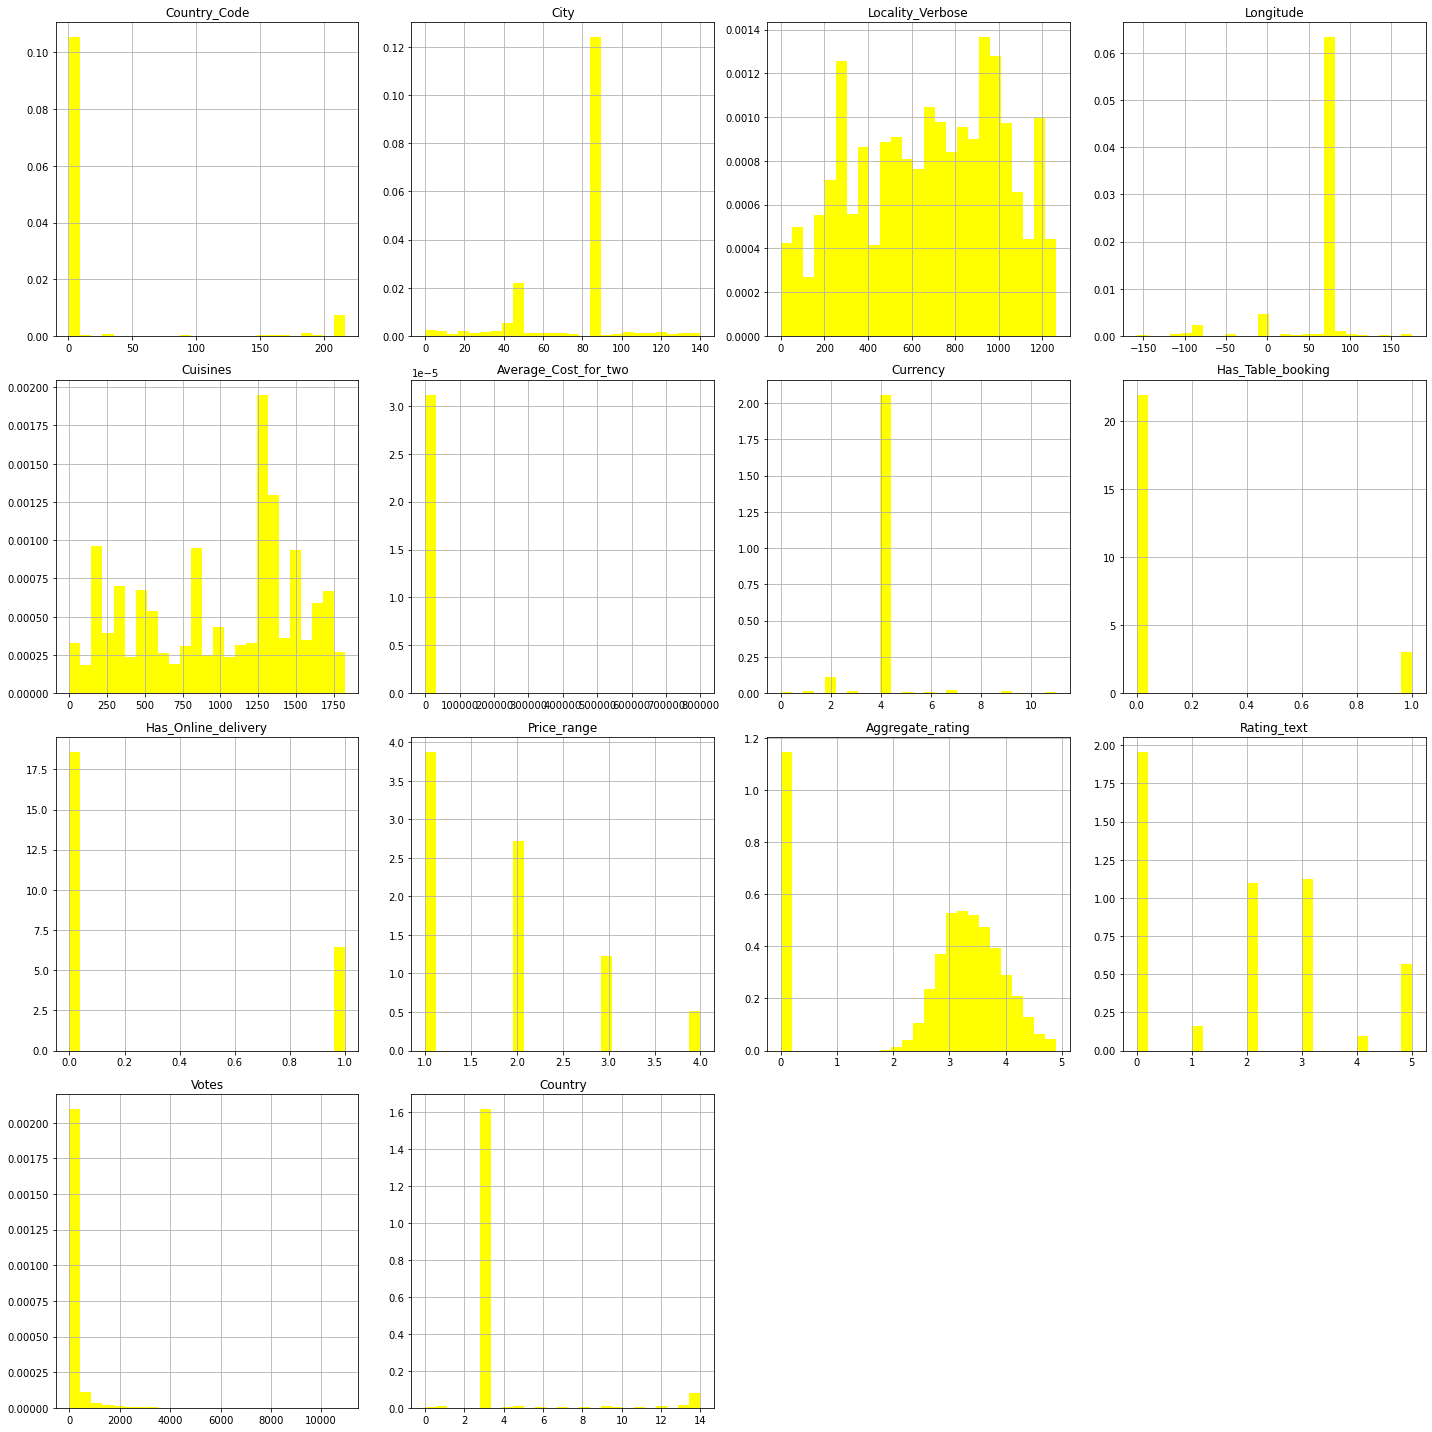

In [65]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Zomato.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

there is skewness present  

Now Lets Remove Skewness Now

In [66]:
Zomato_new.skew()

Country_Code            11.948906
City                    -1.324463
Locality_Verbose        -0.240484
Longitude               -2.196447
Cuisines                -0.340380
Average_Cost_for_two     3.709334
Currency                -0.355218
Has_Table_booking        2.287839
Has_Online_delivery      0.996530
Price_range              1.041782
Aggregate_rating        -0.869559
Rating_text              0.427513
Votes                    3.691408
Country                  7.841960
dtype: float64

Here We have skewness ,. Now remove the skewness from the given columns

In [67]:
Zomato_new.head()


Country_Code  City  Locality_Verbose   Longitude  Cuisines  \
143            14  12.0              94.0  115.984492    1270.0   
144            14  15.0             112.0  146.685852    1619.0   
269            14  37.0             288.0  153.137401     620.0   
290            14  41.0             308.0  153.593331     331.0   
292            14  45.0             334.0  152.877147    1793.0   

     Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
143                    20       2.0                0.0                  0.0   
144                    20       2.0                0.0                  0.0   
269                     7       2.0                0.0                  0.0   
290                    20       2.0                0.0                  0.0   
292                    30       2.0                0.0                  0.0   

     Price_range  Aggregate_rating  Rating_text  Votes  Country  
143            2               3.2          0.0     21      0.0  
144            2               4.6          1.0    237      0.0  
269            1               3.6          2.0     29      0.0  
290            2               4.1          5.0     56      0.0  
292            3               3.5          2.0     37      0.0

In [68]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Zomato_new,method='yeo-johnson')

In [69]:
pd.DataFrame(x_new).skew()

0     9.975108
1     0.170317
2    -0.274605
3     0.908649
4    -0.369689
5     0.035868
6     1.795256
7     2.287839
8     0.996530
9     0.245084
10   -0.630373
11   -0.031245
12   -0.007841
13    2.390003
dtype: float64

We can see that the skewness has been removed from the given columns  .

In [70]:
# It will be a 2 dimensional data contaning rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

Country_Code      City  Locality_Verbose  Longitude  Cuisines  \
0         0.883904 -3.757976         -1.875129   2.160154  0.520021   
1         0.883904 -3.593327         -1.818956   3.725524  1.212387   
2         0.883904 -2.385896         -1.269710   4.054469 -0.769486   
3         0.883904 -2.166363         -1.207295   4.077715 -1.342820   
4         0.883904 -1.946831         -1.126157   4.041199  1.557578   
...            ...       ...               ...        ...       ...   
8499     10.885001  3.102424          1.267434   5.157700 -1.342820   
8500     10.885001  3.102424          1.267434   5.157705  0.371231   
8501     10.885001  3.102424          1.682489   5.157920  0.208555   
8502     10.885001  3.102424          1.682489   5.157830 -0.430247   
8503     10.885001  3.102424          1.682489   5.157917  1.343321   

       Currency  Has_Table_booking  Has_Online_delivery  Price_range  \
0    -10.118639          -0.375522            -0.619043     0.345480   
1    -10.118639          -0.375522            -0.619043     0.345480   
2    -10.118639          -0.375522            -0.619043    -0.833951   
3    -10.118639          -0.375522            -0.619043     0.345480   
4    -10.118639          -0.375522            -0.619043     1.524911   
...         ...                ...                  ...          ...   
8499  10.125781          -0.375522            -0.619043     0.345480   
8500  10.125781          -0.375522            -0.619043     2.704342   
8501  10.125781          -0.375522            -0.619043     2.704342   
8502  10.125781          -0.375522            -0.619043     2.704342   
8503  10.125781          -0.375522            -0.619043     2.704342   

      Aggregate_rating  Rating_text     Votes   Country  
0             0.466484    -1.016616 -0.395585 -9.444348  
1             1.394201    -0.395858  0.795389 -9.444348  
2             0.731546     0.224901 -0.351475 -9.444348  
3             1.062874     2.087177 -0.202603 -9.444348  
4             0.665281     0.224901 -0.307365 -9.444348  
...                ...          ...       ...       ...  
8499          1.195405     2.087177  0.354288  6.228043  
8500          1.129139     2.087177  0.293636  6.228043  
8501          0.797812     0.224901  0.210930  6.228043  
8502          1.195405     2.087177  0.266067  6.228043  
8503          1.062874     2.087177  0.751279  6.228043  

[8504 rows x 13 columns]

In [71]:
x.mean()

Country_Code           6.477519e-15
City                   5.442109e-14
Locality_Verbose      -5.440824e-15
Longitude              1.840276e-16
Cuisines              -7.357969e-17
Currency               5.235490e-15
Has_Table_booking      1.462977e-15
Has_Online_delivery   -2.402933e-15
Price_range           -7.435361e-15
Aggregate_rating      -4.842212e-15
Rating_text            2.184309e-15
Votes                 -3.809668e-16
Country                1.822520e-15
dtype: float64

In [72]:
x.std()

Country_Code           1.000059
City                   1.000059
Locality_Verbose       1.000059
Longitude              1.000059
Cuisines               1.000059
Currency               1.000059
Has_Table_booking      1.000059
Has_Online_delivery    1.000059
Price_range            1.000059
Aggregate_rating       1.000059
Rating_text            1.000059
Votes                  1.000059
Country                1.000059
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [73]:
x.shape

(8504, 13)

In [74]:
y.value_counts()

300     884
500     874
400     841
200     675
600     638
       ... 
7000      1
720       1
220       1
4800      1
110       1
Name: Average_Cost_for_two, Length: 100, dtype: int64

<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='count'>

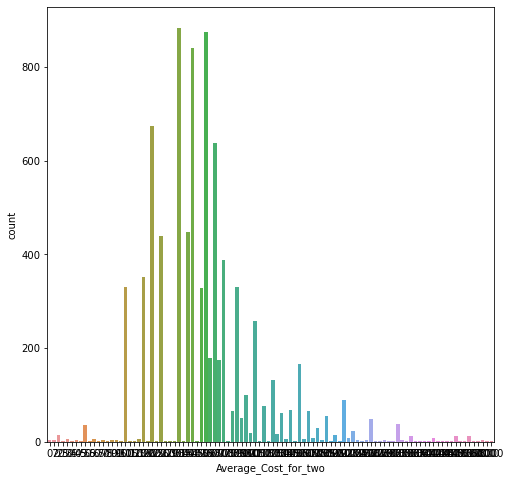

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(y)

Now Lets Whether Multicollinearity is present in the dataset or not 

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [76]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [77]:
vif_cal()

    VIF FACTOR             FEATURES
0     3.433443         Country_Code
1     1.029233                 City
2     1.036773     Locality_Verbose
3     1.262366            Longitude
4     1.022348             Cuisines
5     1.055011             Currency
6     1.557402    Has_Table_booking
7     1.124578  Has_Online_delivery
8     1.906318          Price_range
9     1.843062     Aggregate_rating
10    1.397103          Rating_text
11    1.555726                Votes
12    3.031099              Country


 Let's move to buliding machine learning models...

Model Training and Testing

Now Lets Train and Test the model using Regression Models

In [78]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,8504):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.8072680402645718 on Random_State 7667


In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7667)

In [82]:
x_train

Country_Code      City  Locality_Verbose  Longitude  Cuisines  Currency  \
5619     -0.086352  0.413147          0.406116   0.179710  1.015985  0.003571   
2876     -0.086352  0.413147         -0.976362   0.184446 -0.344941  0.003571   
7116     -0.086352  0.413147          1.601350   0.176253  0.637068  0.003571   
672      -0.086352 -1.672415         -1.360210   0.177800  1.015985  0.003571   
5396     -0.086352  0.413147          0.281287   0.177164 -0.338989  0.003571   
...            ...       ...               ...        ...       ...       ...   
841      -0.086352 -1.672415         -0.246114   0.176679  0.724358  0.003571   
542      -0.086352 -1.672415         -1.403901   0.176984  1.555594  0.003571   
1495     -0.086352 -1.672415          1.476522   0.176713 -0.646487  0.003571   
7185     -0.086352  0.413147          1.726179   0.178599 -0.108862  0.003571   
2487     -0.086352  0.413147         -1.294675   0.184187  0.752132  0.003571   

      Has_Table_booking  Has_Online_delivery  Price_range  Aggregate_rating  \
5619          -0.375522            -0.619043     0.345480          0.135157   
2876          -0.375522            -0.619043    -0.833951          0.599015   
7116           2.662957            -0.619043     1.524911          0.466484   
672           -0.375522             1.615397     0.345480          0.466484   
5396          -0.375522             1.615397     0.345480          0.532750   
...                 ...                  ...          ...               ...   
841           -0.375522             1.615397     0.345480          0.466484   
542           -0.375522             1.615397    -0.833951          0.797812   
1495          -0.375522             1.615397     0.345480          0.532750   
7185          -0.375522             1.615397     0.345480         -1.654011   
2487           2.662957            -0.619043     1.524911          0.930343   

      Rating_text     Votes   Country  
5619    -1.016616 -0.081300 -0.040913  
2876    -1.016616 -0.312879 -0.040913  
7116    -1.016616 -0.340447 -0.040913  
672     -1.016616 -0.103355 -0.040913  
5396    -1.016616  0.006920 -0.040913  
...           ...       ...       ...  
841     -1.016616 -0.097842 -0.040913  
542      0.224901  2.488117 -0.040913  
1495    -1.016616 -0.472778 -0.040913  
7185     0.845659 -0.494833 -0.040913  
2487     0.224901  3.618440 -0.040913  

[5952 rows x 13 columns]

In [83]:
x_test

Country_Code      City  Locality_Verbose  Longitude  Cuisines  Currency  \
4442     -0.086352  0.413147         -0.090078   0.188165  0.504150  0.003571   
3418     -0.086352  0.413147         -0.648687   0.177224 -1.551125  0.003571   
1249     -0.086352 -1.672415          0.871103   0.176188 -1.013500  0.003571   
4196     -0.086352  0.413147         -0.286684   0.183697  0.724358  0.003571   
3489     -0.086352  0.413147         -0.645566   0.185579  1.004082  0.003571   
...            ...       ...               ...        ...       ...       ...   
1307     -0.086352 -1.672415          0.927275   0.177512 -1.013500  0.003571   
3380     -0.086352  0.413147         -0.651808   0.184439  0.529940  0.003571   
2332     -0.086352  0.413147         -1.475677   0.183660  0.817599  0.003571   
248      -0.086352 -2.056597          0.680739   0.188985 -0.356844  0.003571   
4293     -0.086352  0.413147         -0.180579   0.178772  1.226274  0.003571   

      Has_Table_booking  Has_Online_delivery  Price_range  Aggregate_rating  \
4442          -0.375522            -0.619043    -0.833951          0.267688   
3418          -0.375522             1.615397     0.345480          0.599015   
1249          -0.375522            -0.619043    -0.833951         -1.654011   
4196           2.662957            -0.619043     0.345480          0.002626   
3489           2.662957            -0.619043     0.345480         -1.654011   
...                 ...                  ...          ...               ...   
1307          -0.375522            -0.619043    -0.833951         -1.654011   
3380          -0.375522            -0.619043    -0.833951          0.333953   
2332           2.662957            -0.619043     1.524911          0.930343   
248           -0.375522            -0.619043    -0.833951         -1.654011   
4293          -0.375522            -0.619043    -0.833951         -1.654011   

      Rating_text     Votes   Country  
4442    -1.016616 -0.483806 -0.040913  
3418    -1.016616 -0.224658 -0.040913  
1249     0.845659 -0.511374 -0.040913  
4196    -1.016616 -0.208117 -0.040913  
3489     0.845659 -0.505861 -0.040913  
...           ...       ...       ...  
1307     0.845659 -0.511374 -0.040913  
3380    -1.016616 -0.483806 -0.040913  
2332     0.224901  5.112672 -0.040913  
248      0.845659 -0.511374 -0.040913  
4293     0.845659 -0.500347 -0.040913  

[2552 rows x 13 columns]

In [84]:
y_train

6411     500
3647     200
7920    1100
1365     500
6187     500
        ... 
1535     550
1226     200
2194     700
7989     600
3247    1500
Name: Average_Cost_for_two, Length: 5952, dtype: int64

In [85]:
y_test

5232     150
4200     500
1948     250
4984     850
4271     700
        ... 
2006     100
4160     150
3077    1200
929      100
5083     250
Name: Average_Cost_for_two, Length: 2552, dtype: int64

  REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [86]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [87]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

In [ ]:
for i in models:
    create_model(i)

Now Lets consider model which Model should we go for as a final model

Hyper parameter tuning

In [129]:
#Gradient boosting regressor
gb_params = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}


In [130]:
gbr=GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
RSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)

In [131]:
RSCV.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [132]:
RSCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': False}

In [137]:
Final_Model = GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error', max_features='auto',warm_start=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 88.79536508666673


In [138]:
Final_Model

GradientBoostingRegressor(max_features='auto', warm_start=True)

In [143]:
from sklearn.model_selection import GridSearchCV

In [147]:
#Gradient boosting regressor
params = {'criterion':['friedman_mse', 'squared_error'],
             'max_features':['auto', 'sqrt', 'log2'],
             'loss':['squared_error','absolute_error','huber','quantile'],
             'warm_start':[True,False]}

In [148]:
gbr=GradientBoostingRegressor
GSCV=GridSearchCV(gbr(),gb_params,cv=10,n_jobs=-1,verbose=True)

In [149]:
GSCV.fit(x_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]},
             verbose=True)

In [150]:
GSCV.best_params_

{'criterion': 'squared_error',
 'loss': 'squared_error',
 'max_features': 'auto',
 'warm_start': False}

In [152]:
Last_Model = GradientBoostingRegressor(criterion='squared_error',loss='squared_error', max_features='auto',warm_start=False)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 88.78336545439889


In [153]:
Last_Model

GradientBoostingRegressor(criterion='squared_error', max_features='auto')

In [154]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [155]:
lasso= Lasso(alpha=0.0001)

In [156]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [157]:
lasso.score(x_train,y_train)

0.7147306403799055

In [158]:
lasso_pred=lasso.predict(x_test)

In [159]:
r2_score(y_test,lasso_pred)

0.7715039404743681

In [160]:
ridge=Ridge(alpha=0.1)

In [161]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [162]:
ridge.score(x_train,y_train)*100

71.47306399767665

In [163]:
ridge_pred=ridge.predict(x_test)

In [164]:
r2_score(y_test,ridge_pred)

0.7715055867947089

save the final model

In [165]:
#saving the model
import joblib
joblib.dump(Final_Model,'ZomatoAvg.pkl')

['ZomatoAvg.pkl']

In [166]:
#Loading the saved model
ZomatoAvg=joblib.load('ZomatoAvg.pkl')

Prediction

In [167]:
prediction =ZomatoAvg.predict(x_test)
prediction

array([ 259.18849049,  604.97597099,  294.07793174, ..., 1491.87069377,
        248.23069066,  290.97680582])

In [168]:
pd.DataFrame([ZomatoAvg.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0           1           2           3           4     \
Predicted  259.18849  604.975971  294.077932  805.617389  765.191592   
Original   150.00000  500.000000  250.000000  850.000000  700.000000   

                 5           6           7           8           9     ...  \
Predicted  274.557017  262.452039  595.859667  573.851235  605.247169  ...   
Original   450.000000  250.000000  550.000000  500.000000  500.000000  ...   

                 2542        2543        2544        2545        2546  \
Predicted  804.184688  559.775513  265.130788  280.859917  612.174623   
Original   850.000000  800.000000  350.000000  300.000000  500.000000   

                 2547        2548         2549        2550        2551  
Predicted  294.077932  275.241169  1491.870694  248.230691  290.976806  
Original   100.000000  150.000000  1200.000000  100.000000  250.000000  

[2 rows x 2552 columns]

<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='Density'>

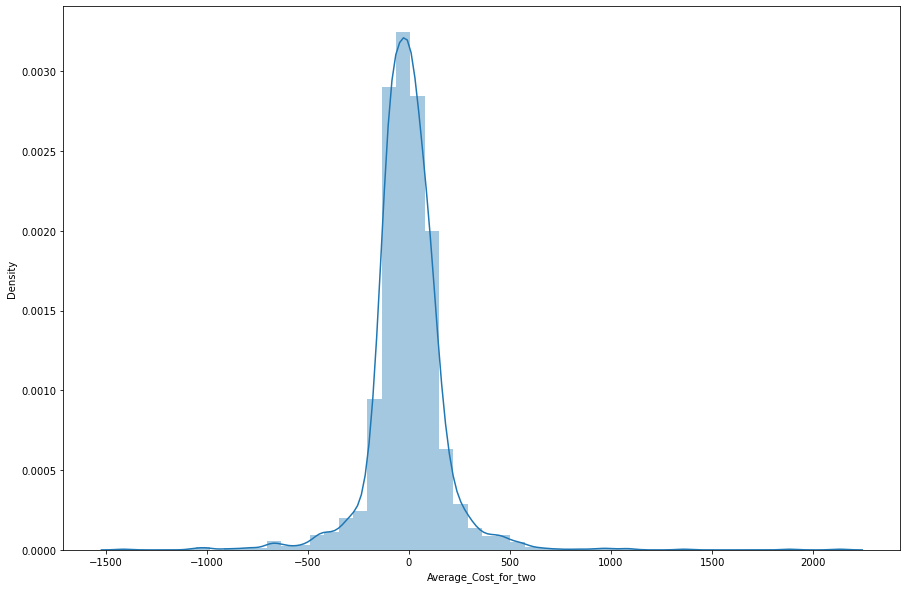

In [169]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [172]:
import pickle
filename = 'ZomatoAvg'
pickle.dump(Final_Model,open(filename, 'wb'))

In [173]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

88.79536508666673


<AxesSubplot:xlabel='Average_Cost_for_two', ylabel='Density'>

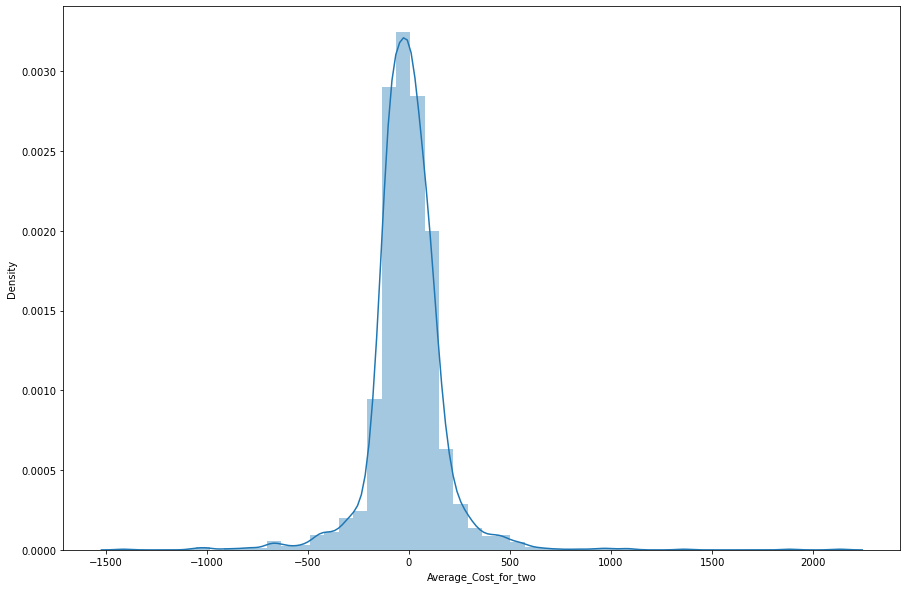

In [174]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

# Power project as Classifier problem


Extracting the Data

In [176]:
Zomato_new

Country_Code   City  Locality_Verbose   Longitude  Cuisines  \
143             14   12.0              94.0  115.984492    1270.0   
144             14   15.0             112.0  146.685852    1619.0   
269             14   37.0             288.0  153.137401     620.0   
290             14   41.0             308.0  153.593331     331.0   
292             14   45.0             334.0  152.877147    1793.0   
...            ...    ...               ...         ...       ...   
9332           148  137.0            1101.0  174.774912     331.0   
9333           148  137.0            1101.0  174.775005    1195.0   
9334           148  137.0            1234.0  174.779224    1113.0   
9335           148  137.0            1234.0  174.777465     791.0   
9336           148  137.0            1234.0  174.779167    1685.0   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
143                     20       2.0                0.0                  0.0   
144                     20       2.0                0.0                  0.0   
269                      7       2.0                0.0                  0.0   
290                     20       2.0                0.0                  0.0   
292                     30       2.0                0.0                  0.0   
...                    ...       ...                ...                  ...   
9332                    40       6.0                0.0                  0.0   
9333                    80       6.0                0.0                  0.0   
9334                    70       6.0                0.0                  0.0   
9335                   110       6.0                0.0                  0.0   
9336                    90       6.0                0.0                  0.0   

      Price_range  Aggregate_rating  Rating_text  Votes  Country  
143             2               3.2          0.0     21      0.0  
144             2               4.6          1.0    237      0.0  
269             1               3.6          2.0     29      0.0  
290             2               4.1          5.0     56      0.0  
292             3               3.5          2.0     37      0.0  
...           ...               ...          ...    ...      ...  
9332            2               4.3          5.0    157      5.0  
9333            4               4.2          5.0    146      5.0  
9334            4               3.7          2.0    131      5.0  
9335            4               4.3          5.0    141      5.0  
9336            4               4.1          5.0    229      5.0  

[8504 rows x 14 columns]

In [179]:
# List of values in the target column
Zomato_new['Price_range'].value_counts()

1    4283
2    2813
3    1024
4     384
Name: Price_range, dtype: int64

In [180]:
#Frequency of 'primary_fuel'
Zomato_new['Price_range'].value_counts()

1    4283
2    2813
3    1024
4     384
Name: Price_range, dtype: int64

<AxesSubplot:xlabel='Price_range', ylabel='count'>

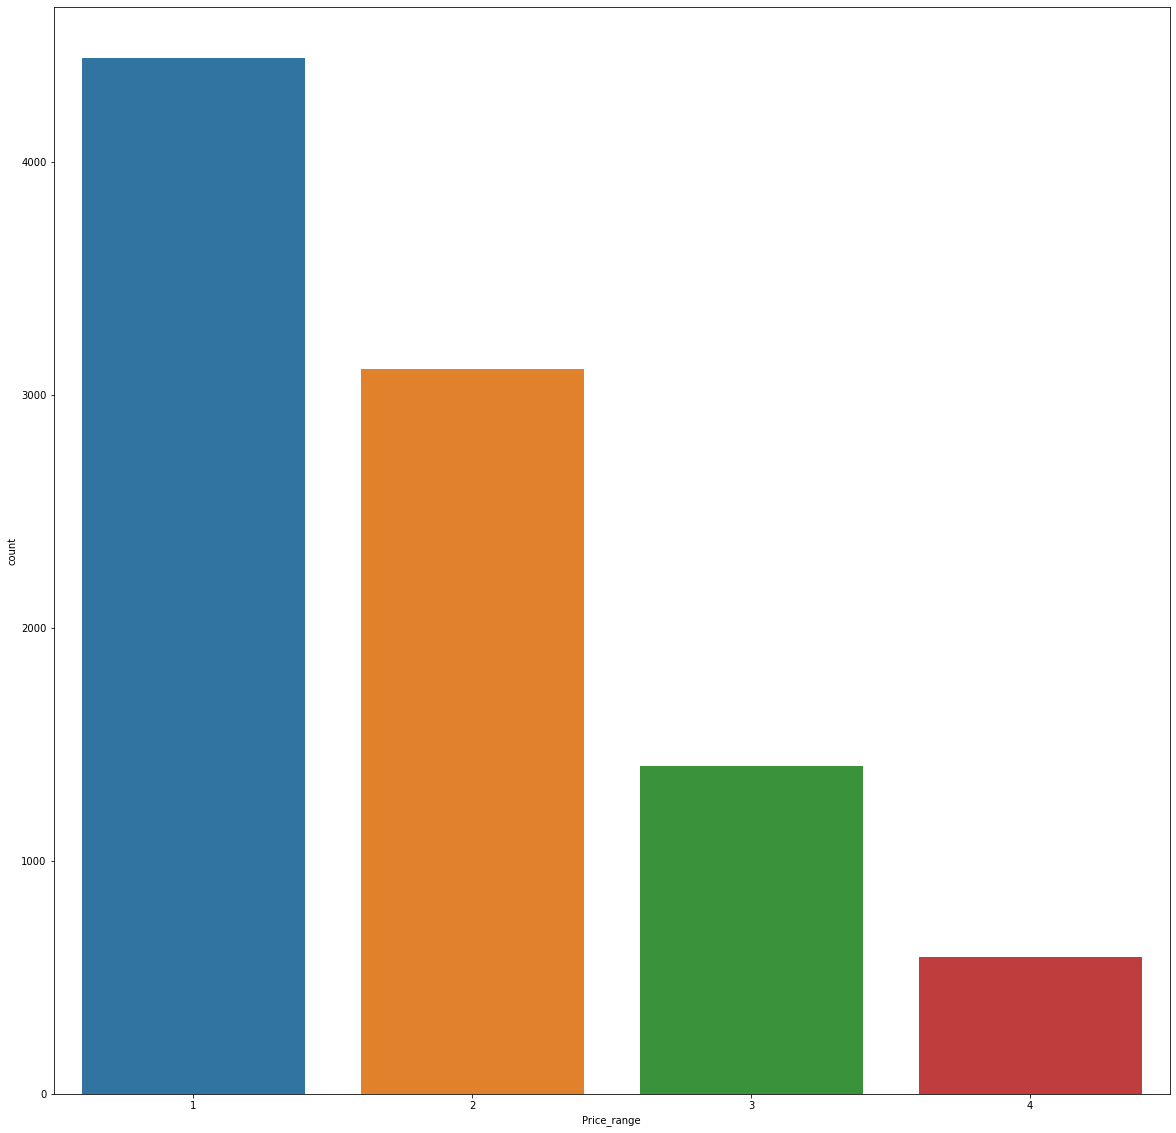

In [181]:
# Plotting the 'primary_fuel' frequency
sns.countplot(data=Zomato,x='Price_range')

In [182]:
#Normalizing the frequency table of 'primary_fuel' variable
Zomato['Price_range'].value_counts(normalize=True)

1    0.465292
2    0.325934
3    0.147419
4    0.061355
Name: Price_range, dtype: float64

In [183]:
#Frequency table
Zomato['Price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64

In [184]:
Zomato.corr()

Country_Code      City  Locality_Verbose  Longitude  \
Country_Code              1.000000 -0.181728         -0.117543  -0.698299   
City                     -0.181728  1.000000          0.093141   0.117391   
Locality_Verbose         -0.117543  0.093141          1.000000   0.084340   
Longitude                -0.698299  0.117391          0.084340   1.000000   
Cuisines                 -0.133514  0.026766          0.006047   0.126863   
Average_Cost_for_two      0.043225 -0.028838         -0.011852   0.045891   
Currency                 -0.033466 -0.071996          0.022960   0.337334   
Has_Table_booking        -0.061682 -0.003762         -0.065132   0.100488   
Has_Online_delivery      -0.154605  0.012723         -0.031766   0.178757   
Price_range               0.243327 -0.105759         -0.112311  -0.078939   
Aggregate_rating          0.282189 -0.132163         -0.173253  -0.116818   
Rating_text               0.222685 -0.098985         -0.035430  -0.181466   
Votes                     0.154530 -0.078406         -0.122877  -0.085101   
Country                   0.968700 -0.180959         -0.116408  -0.766221   

                      Cuisines  Average_Cost_for_two  Currency  \
Country_Code         -0.133514              0.043225 -0.033466   
City                  0.026766             -0.028838 -0.071996   
Locality_Verbose      0.006047             -0.011852  0.022960   
Longitude             0.126863              0.045891  0.337334   
Cuisines              1.000000              0.005844  0.069291   
Average_Cost_for_two  0.005844              1.000000  0.045615   
Currency              0.069291              0.045615  1.000000   
Has_Table_booking     0.050707              0.007758  0.000640   
Has_Online_delivery  -0.016539             -0.018974  0.006991   
Price_range          -0.005324              0.075083  0.075179   
Aggregate_rating     -0.080475              0.051792 -0.006939   
Rating_text          -0.079963              0.031439  0.014598   
Votes                -0.032780              0.067783 -0.027111   
Country              -0.128633             -0.004034 -0.105296   

                      Has_Table_booking  Has_Online_delivery  Price_range  \
Country_Code                  -0.061682            -0.154605     0.243327   
City                          -0.003762             0.012723    -0.105759   
Locality_Verbose              -0.065132            -0.031766    -0.112311   
Longitude                      0.100488             0.178757    -0.078939   
Cuisines                       0.050707            -0.016539    -0.005324   
Average_Cost_for_two           0.007758            -0.018974     0.075083   
Currency                       0.000640             0.006991     0.075179   
Has_Table_booking              1.000000             0.101224     0.501925   
Has_Online_delivery            0.101224             1.000000     0.077918   
Price_range                    0.501925             0.077918     1.000000   
Aggregate_rating               0.189998             0.225699     0.437944   
Rating_text                    0.044043            -0.080937     0.164242   
Votes                          0.169422             0.074303     0.309444   
Country                       -0.062076            -0.140464     0.178035   

                      Aggregate_rating  Rating_text     Votes   Country  
Country_Code                  0.282189     0.222685  0.154530  0.968700  
City                         -0.132163    -0.098985 -0.078406 -0.180959  
Locality_Verbose             -0.173253    -0.035430 -0.122877 -0.116408  
Longitude                    -0.116818    -0.181466 -0.085101 -0.766221  
Cuisines                     -0.080475    -0.079963 -0.032780 -0.128633  
Average_Cost_for_two          0.051792     0.031439  0.067783 -0.004034  
Currency                     -0.006939     0.014598 -0.027111 -0.105296  
Has_Table_booking             0.189998     0.044043  0.169422 -0.062076  
Has_Online_delivery           0.225699    -0.080937  

In [185]:
Zomato.corr()['Price_range'].sort_values()

Locality_Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Cuisines               -0.005324
Average_Cost_for_two    0.075083
Currency                0.075179
Has_Online_delivery     0.077918
Rating_text             0.164242
Country                 0.178035
Country_Code            0.243327
Votes                   0.309444
Aggregate_rating        0.437944
Has_Table_booking       0.501925
Price_range             1.000000
Name: Price_range, dtype: float64

<AxesSubplot:>

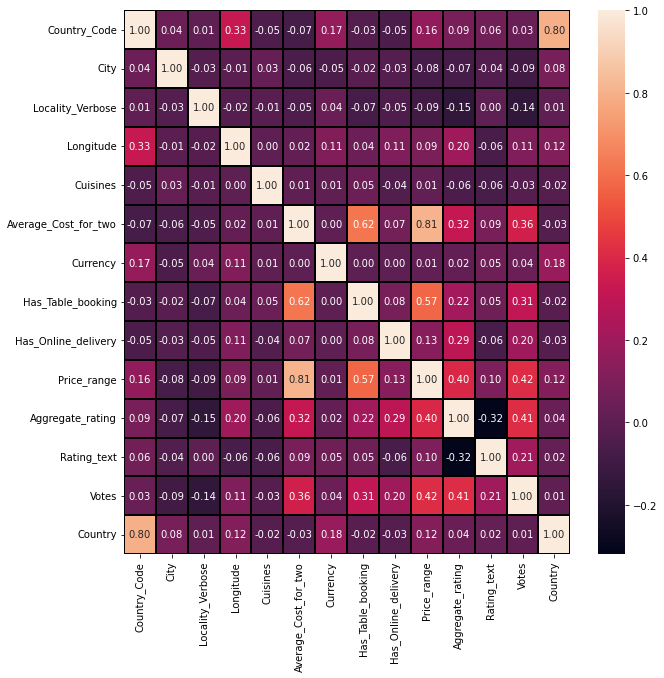

In [186]:
plt.figure(figsize = (10,10))
sns.heatmap(Zomato_new.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [188]:
#seperate feature variable and target variable
x = Zomato_new.drop (['Price_range'], axis = 1)
y = Zomato_new['Price_range']

In [189]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

Country_Code      City  Locality_Verbose  Longitude  Cuisines  \
0         0.883904 -3.757976         -1.875129   2.160154  0.520021   
1         0.883904 -3.593327         -1.818956   3.725524  1.212387   
2         0.883904 -2.385896         -1.269710   4.054469 -0.769486   
3         0.883904 -2.166363         -1.207295   4.077715 -1.342820   
4         0.883904 -1.946831         -1.126157   4.041199  1.557578   
...            ...       ...               ...        ...       ...   
8499     10.885001  3.102424          1.267434   5.157700 -1.342820   
8500     10.885001  3.102424          1.267434   5.157705  0.371231   
8501     10.885001  3.102424          1.682489   5.157920  0.208555   
8502     10.885001  3.102424          1.682489   5.157830 -0.430247   
8503     10.885001  3.102424          1.682489   5.157917  1.343321   

      Average_Cost_for_two   Currency  Has_Table_booking  Has_Online_delivery  \
0                -1.000008 -10.118639          -0.375522            -0.619043   
1                -1.000008 -10.118639          -0.375522            -0.619043   
2                -1.022290 -10.118639          -0.375522            -0.619043   
3                -1.000008 -10.118639          -0.375522            -0.619043   
4                -0.982868 -10.118639          -0.375522            -0.619043   
...                    ...        ...                ...                  ...   
8499             -0.965728  10.125781          -0.375522            -0.619043   
8500             -0.897168  10.125781          -0.375522            -0.619043   
8501             -0.914308  10.125781          -0.375522            -0.619043   
8502             -0.845748  10.125781          -0.375522            -0.619043   
8503             -0.880028  10.125781          -0.375522            -0.619043   

      Aggregate_rating  Rating_text     Votes   Country  
0             0.466484    -1.016616 -0.395585 -9.444348  
1             1.394201    -0.395858  0.795389 -9.444348  
2             0.731546     0.224901 -0.351475 -9.444348  
3             1.062874     2.087177 -0.202603 -9.444348  
4             0.665281     0.224901 -0.307365 -9.444348  
...                ...          ...       ...       ...  
8499          1.195405     2.087177  0.354288  6.228043  
8500          1.129139     2.087177  0.293636  6.228043  
8501          0.797812     0.224901  0.210930  6.228043  
8502          1.195405     2.087177  0.266067  6.228043  
8503          1.062874     2.087177  0.751279  6.228043  

[8504 rows x 13 columns]

In [190]:
x.mean()

Country_Code            6.477519e-15
City                    5.442109e-14
Locality_Verbose       -5.440824e-15
Longitude               1.840276e-16
Cuisines               -7.357969e-17
Average_Cost_for_two   -9.573193e-16
Currency                5.235490e-15
Has_Table_booking       1.462977e-15
Has_Online_delivery    -2.402933e-15
Aggregate_rating       -4.842212e-15
Rating_text             2.184309e-15
Votes                  -3.809668e-16
Country                 1.822520e-15
dtype: float64

In [191]:
x.std()

Country_Code            1.000059
City                    1.000059
Locality_Verbose        1.000059
Longitude               1.000059
Cuisines                1.000059
Average_Cost_for_two    1.000059
Currency                1.000059
Has_Table_booking       1.000059
Has_Online_delivery     1.000059
Aggregate_rating        1.000059
Rating_text             1.000059
Votes                   1.000059
Country                 1.000059
dtype: float64

In [192]:
Zomato_new['Price_range'].value_counts()

1    4283
2    2813
3    1024
4     384
Name: Price_range, dtype: int64

In [195]:
x

Country_Code      City  Locality_Verbose  Longitude  Cuisines  \
0         0.883904 -3.757976         -1.875129   2.160154  0.520021   
1         0.883904 -3.593327         -1.818956   3.725524  1.212387   
2         0.883904 -2.385896         -1.269710   4.054469 -0.769486   
3         0.883904 -2.166363         -1.207295   4.077715 -1.342820   
4         0.883904 -1.946831         -1.126157   4.041199  1.557578   
...            ...       ...               ...        ...       ...   
8499     10.885001  3.102424          1.267434   5.157700 -1.342820   
8500     10.885001  3.102424          1.267434   5.157705  0.371231   
8501     10.885001  3.102424          1.682489   5.157920  0.208555   
8502     10.885001  3.102424          1.682489   5.157830 -0.430247   
8503     10.885001  3.102424          1.682489   5.157917  1.343321   

      Average_Cost_for_two   Currency  Has_Table_booking  Has_Online_delivery  \
0                -1.000008 -10.118639          -0.375522            -0.619043   
1                -1.000008 -10.118639          -0.375522            -0.619043   
2                -1.022290 -10.118639          -0.375522            -0.619043   
3                -1.000008 -10.118639          -0.375522            -0.619043   
4                -0.982868 -10.118639          -0.375522            -0.619043   
...                    ...        ...                ...                  ...   
8499             -0.965728  10.125781          -0.375522            -0.619043   
8500             -0.897168  10.125781          -0.375522            -0.619043   
8501             -0.914308  10.125781          -0.375522            -0.619043   
8502             -0.845748  10.125781          -0.375522            -0.619043   
8503             -0.880028  10.125781          -0.375522            -0.619043   

      Aggregate_rating  Rating_text     Votes   Country  
0             0.466484    -1.016616 -0.395585 -9.444348  
1             1.394201    -0.395858  0.795389 -9.444348  
2             0.731546     0.224901 -0.351475 -9.444348  
3             1.062874     2.087177 -0.202603 -9.444348  
4             0.665281     0.224901 -0.307365 -9.444348  
...                ...          ...       ...       ...  
8499          1.195405     2.087177  0.354288  6.228043  
8500          1.129139     2.087177  0.293636  6.228043  
8501          0.797812     0.224901  0.210930  6.228043  
8502          1.195405     2.087177  0.266067  6.228043  
8503          1.062874     2.087177  0.751279  6.228043  

[8504 rows x 13 columns]

In [193]:
x.shape

(8504, 13)

In [196]:
y

143     2
144     2
269     1
290     2
292     3
       ..
9332    2
9333    4
9334    4
9335    4
9336    4
Name: Price_range, Length: 8504, dtype: int64

In [197]:
y.shape

(8504,)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [198]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [199]:
vif_cal()

    VIF FACTOR              FEATURES
0     3.429787          Country_Code
1     1.026608                  City
2     1.039465      Locality_Verbose
3     1.259305             Longitude
4     1.020899              Cuisines
5     1.851886  Average_Cost_for_two
6     1.053319              Currency
7     1.664621     Has_Table_booking
8     1.130997   Has_Online_delivery
9     1.801118      Aggregate_rating
10    1.392608           Rating_text
11    1.542618                 Votes
12    3.049557               Country


In [200]:
Zomato_new

Country_Code   City  Locality_Verbose   Longitude  Cuisines  \
143             14   12.0              94.0  115.984492    1270.0   
144             14   15.0             112.0  146.685852    1619.0   
269             14   37.0             288.0  153.137401     620.0   
290             14   41.0             308.0  153.593331     331.0   
292             14   45.0             334.0  152.877147    1793.0   
...            ...    ...               ...         ...       ...   
9332           148  137.0            1101.0  174.774912     331.0   
9333           148  137.0            1101.0  174.775005    1195.0   
9334           148  137.0            1234.0  174.779224    1113.0   
9335           148  137.0            1234.0  174.777465     791.0   
9336           148  137.0            1234.0  174.779167    1685.0   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
143                     20       2.0                0.0                  0.0   
144                     20       2.0                0.0                  0.0   
269                      7       2.0                0.0                  0.0   
290                     20       2.0                0.0                  0.0   
292                     30       2.0                0.0                  0.0   
...                    ...       ...                ...                  ...   
9332                    40       6.0                0.0                  0.0   
9333                    80       6.0                0.0                  0.0   
9334                    70       6.0                0.0                  0.0   
9335                   110       6.0                0.0                  0.0   
9336                    90       6.0                0.0                  0.0   

      Price_range  Aggregate_rating  Rating_text  Votes  Country  
143             2               3.2          0.0     21      0.0  
144             2               4.6          1.0    237      0.0  
269             1               3.6          2.0     29      0.0  
290             2               4.1          5.0     56      0.0  
292             3               3.5          2.0     37      0.0  
...           ...               ...          ...    ...      ...  
9332            2               4.3          5.0    157      5.0  
9333            4               4.2          5.0    146      5.0  
9334            4               3.7          2.0    131      5.0  
9335            4               4.3          5.0    141      5.0  
9336            4               4.1          5.0    229      5.0  

[8504 rows x 14 columns]

In [201]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,8504):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.7806504776769468 on Random_State 7178


In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7178)

In [203]:
x_train

Country_Code      City  Locality_Verbose  Longitude  Cuisines  \
4396     -0.086352  0.413147         -0.140010   0.183340 -0.832969   
8256     -0.086352  0.468030          1.205019   0.191052  0.555730   
4820     -0.086352  0.413147          0.009785   0.183610 -0.356844   
5617     -0.086352  0.413147          0.406116   0.179291  1.023920   
3866     -0.086352  0.413147         -0.489530   0.183972  0.529940   
...            ...       ...               ...        ...       ...   
4239     -0.086352  0.413147         -0.180579   0.178969  1.093355   
5389     -0.086352  0.413147          0.281287   0.178070  0.504150   
4582     -0.086352  0.413147         -0.083837   0.189542 -0.523488   
7007     -0.086352  0.413147          1.554540   0.188883 -0.971839   
4300     -0.086352  0.413147         -0.180579   0.179066  0.591439   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
4396              0.422612  0.003571          -0.375522             1.615397   
8256              0.165512  0.003571          -0.375522             1.615397   
4820             -0.948588  0.003571          -0.375522            -0.619043   
5617             -0.005888  0.003571          -0.375522             1.615397   
3866             -0.348688  0.003571          -0.375522            -0.619043   
...                    ...       ...                ...                  ...   
4239              0.679712  0.003571           2.662957            -0.619043   
5389             -0.862888  0.003571          -0.375522            -0.619043   
4582             -0.177288  0.003571          -0.375522            -0.619043   
7007             -0.605788  0.003571          -0.375522            -0.619043   
4300             -0.777188  0.003571          -0.375522            -0.619043   

      Aggregate_rating  Rating_text     Votes   Country  
4396          0.731546     0.224901  0.966316 -0.040913  
8256          0.068891    -1.016616 -0.092328 -0.040913  
4820         -1.654011     0.845659 -0.511374 -0.040913  
5617          0.599015    -1.016616  0.194388 -0.040913  
3866          0.797812     0.224901 -0.075786 -0.040913  
...                ...          ...       ...       ...  
4239          0.267688    -1.016616 -0.472778 -0.040913  
5389          0.599015    -1.016616 -0.257741 -0.040913  
4582         -1.654011     0.845659 -0.505861 -0.040913  
7007         -1.654011     0.845659 -0.511374 -0.040913  
4300         -1.654011     0.845659 -0.511374 -0.040913  

[5952 rows x 13 columns]

In [204]:
x_test

Country_Code      City  Locality_Verbose  Longitude  Cuisines  \
7112     -0.086352  0.413147          1.601350   0.175455 -1.648334   
1705     -0.086352 -0.629634         -0.991966   0.375891 -1.205934   
6620     -0.086352  0.413147          1.183174   0.178206 -0.356844   
4979     -0.086352  0.413147          0.053475   0.179464 -1.648334   
4707     -0.086352  0.413147         -0.024543   0.179930 -0.043395   
...            ...       ...               ...        ...       ...   
6499     -0.086352  0.413147          1.052104   0.186054 -1.993525   
6912     -0.086352  0.413147          1.542057   0.181174 -1.892349   
5337     -0.086352  0.413147          0.209510   0.180724  1.226274   
94       -0.086352 -3.538444          1.236227   0.192791 -0.356844   
1211     -0.086352 -1.672415          0.839895   0.174762 -1.995509   

      Average_Cost_for_two  Currency  Has_Table_booking  Has_Online_delivery  \
7112             -0.691488  0.003571          -0.375522            -0.619043   
1705             -0.262988  0.003571          -0.375522            -0.619043   
6620             -0.777188  0.003571          -0.375522            -0.619043   
4979             -0.691488  0.003571          -0.375522            -0.619043   
4707             -0.348688  0.003571          -0.375522            -0.619043   
...                    ...       ...                ...                  ...   
6499             -0.177288  0.003571          -0.375522            -0.619043   
6912              0.679712  0.003571          -0.375522             1.615397   
5337              0.165512  0.003571          -0.375522            -0.619043   
94               -0.177288  0.003571          -0.375522            -0.619043   
1211              0.508312  0.003571          -0.375522            -0.619043   

      Aggregate_rating  Rating_text     Votes   Country  
7112          0.466484    -1.016616 -0.417640 -0.040913  
1705          0.930343     0.224901  0.685114 -0.040913  
6620         -1.654011     0.845659 -0.511374 -0.040913  
4979          0.333953    -1.016616 -0.489319 -0.040913  
4707          0.665281     0.224901 -0.329420 -0.040913  
...                ...          ...       ...       ...  
6499         -1.654011     0.845659 -0.494833 -0.040913  
6912          0.864077     0.224901  2.901650 -0.040913  
5337         -1.654011     0.845659 -0.511374 -0.040913  
94            1.195405     2.087177  0.150278 -0.040913  
1211         -1.654011     0.845659 -0.511374 -0.040913  

[2552 rows x 13 columns]

In [205]:
y_train

5186    2
9062    2
5610    1
6409    2
4653    1
       ..
5029    3
6180    1
5372    2
7810    1
5090    1
Name: Price_range, Length: 5952, dtype: int64

In [206]:
y_test

7916    1
2422    2
7423    1
5769    1
5497    1
       ..
7302    2
7715    3
6127    2
765     2
1910    2
Name: Price_range, Length: 2552, dtype: int64

In [210]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

In [211]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

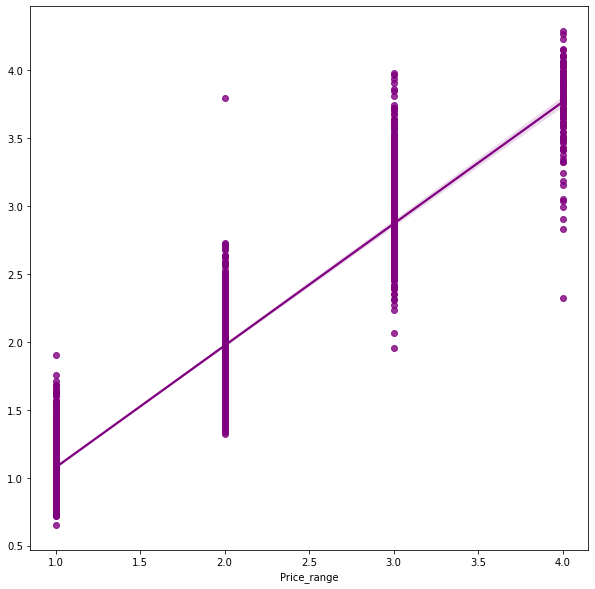

SVR()
Mean absolute error 0.22882369523493767
Mean squared error 0.08592258189132572
Root Mean squared error 0.29312553947298026
R2 Score 0.8824911424963248
At random state SVR(),the training accuracy is :- 0.8947859284593983
At random state SVR(),the testing accuracy is :- 0.8824911424963248
Cross Validation Score: 0.8234306834333877
Difference Between r2_score and CrossValidation Score: 0.05906045906293711
---------------------------------------------------------------------------------------------------------


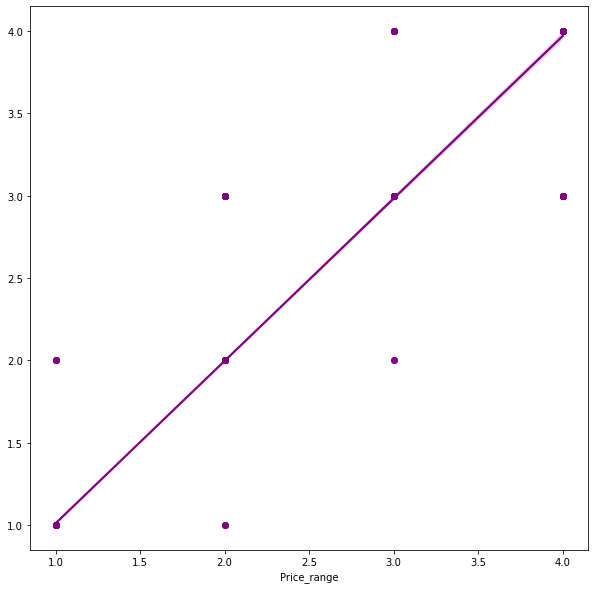

DecisionTreeRegressor()
Mean absolute error 0.015282131661442006
Mean squared error 0.015282131661442006
Root Mean squared error 0.12362091919024873
R2 Score 0.9790999549567995
At random state DecisionTreeRegressor(),the training accuracy is :- 1.0
At random state DecisionTreeRegressor(),the testing accuracy is :- 0.9790999549567995
Cross Validation Score: 0.8766619902541907
Difference Between r2_score and CrossValidation Score: 0.1024379647026088
---------------------------------------------------------------------------------------------------------


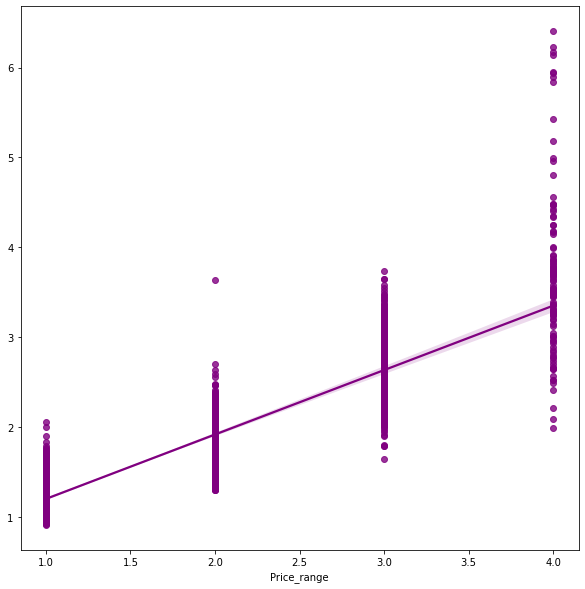

LinearRegression()
Mean absolute error 0.3280853395423406
Mean squared error 0.16933944367741272
Root Mean squared error 0.4115087407059693
R2 Score 0.7684091408937326
At random state LinearRegression(),the training accuracy is :- 0.722548739138059
At random state LinearRegression(),the testing accuracy is :- 0.7684091408937326
Cross Validation Score: -7.486658603560422e+23
Difference Between r2_score and CrossValidation Score: 7.486658603560422e+23
---------------------------------------------------------------------------------------------------------


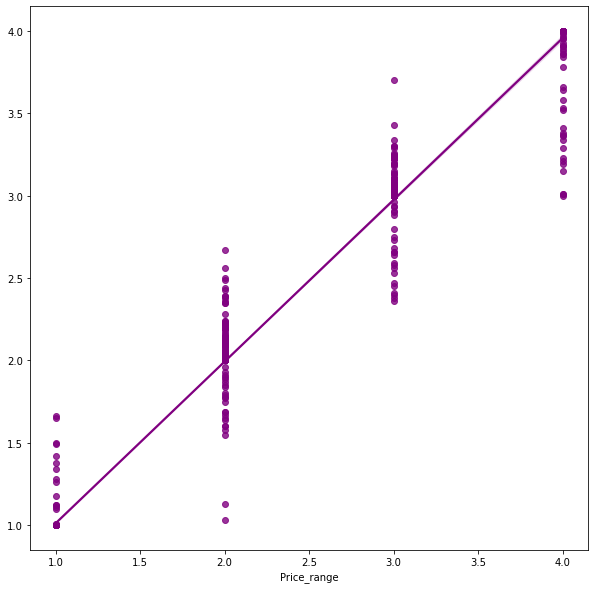

RandomForestRegressor()
Mean absolute error 0.020579937304075233
Mean squared error 0.009159874608150473
Root Mean squared error 0.09570723383397137
R2 Score 0.9874728345402601
At random state RandomForestRegressor(),the training accuracy is :- 0.9978939487326546
At random state RandomForestRegressor(),the testing accuracy is :- 0.9874728345402601
Cross Validation Score: 0.9275808995736095
Difference Between r2_score and CrossValidation Score: 0.059891934966650684
---------------------------------------------------------------------------------------------------------


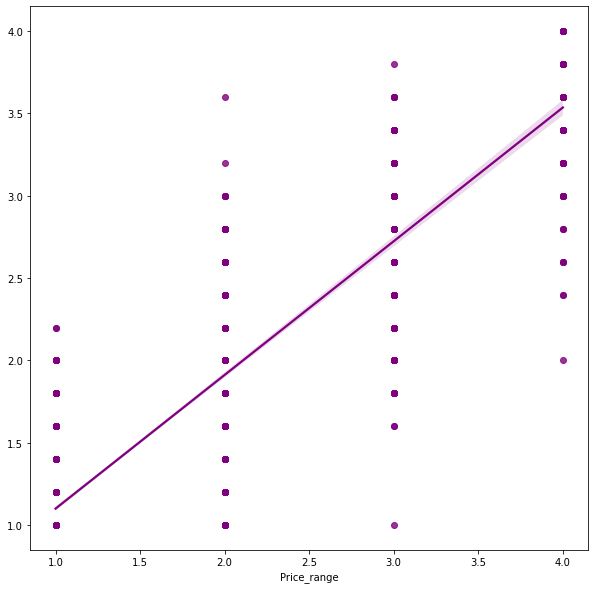

KNeighborsRegressor()
Mean absolute error 0.2084639498432602
Mean squared error 0.1236677115987461
Root Mean squared error 0.3516642028963797
R2 Score 0.8308704047273312
At random state KNeighborsRegressor(),the training accuracy is :- 0.8831408002742311
At random state KNeighborsRegressor(),the testing accuracy is :- 0.8308704047273312
Cross Validation Score: 0.7759859203856398
Difference Between r2_score and CrossValidation Score: 0.05488448434169135
---------------------------------------------------------------------------------------------------------


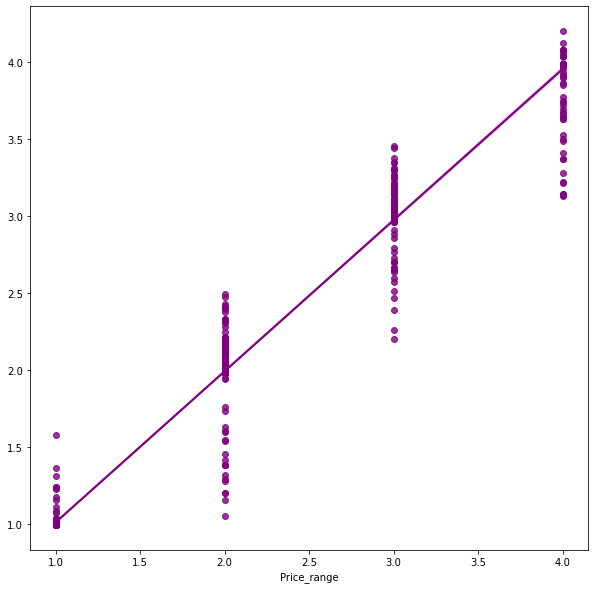

GradientBoostingRegressor()
Mean absolute error 0.032857082869502355
Mean squared error 0.009961114421932152
Root Mean squared error 0.09980538273025234
R2 Score 0.98637704839148
At random state GradientBoostingRegressor(),the training accuracy is :- 0.9918416533969555
At random state GradientBoostingRegressor(),the testing accuracy is :- 0.98637704839148
Cross Validation Score: 0.9484146138984544
Difference Between r2_score and CrossValidation Score: 0.03796243449302561
---------------------------------------------------------------------------------------------------------


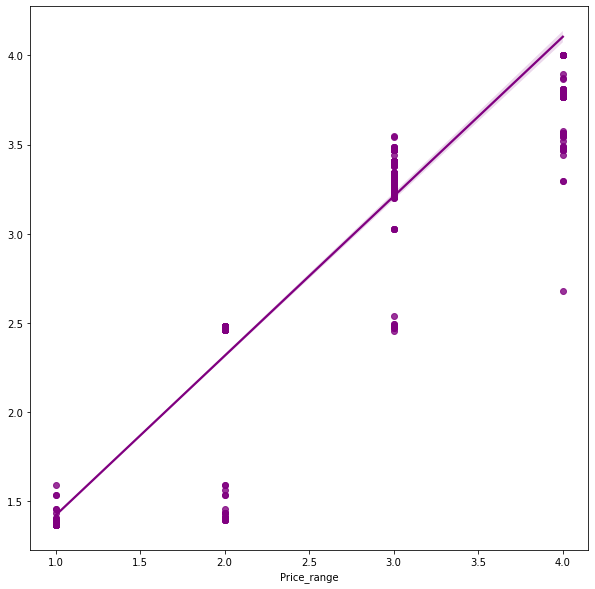

AdaBoostRegressor()
Mean absolute error 0.3836646554691867
Mean squared error 0.1543237517934789
Root Mean squared error 0.392840618818216
R2 Score 0.7889447993791814
At random state AdaBoostRegressor(),the training accuracy is :- 0.7833165525707928
At random state AdaBoostRegressor(),the testing accuracy is :- 0.7889447993791814
Cross Validation Score: 0.8852604226308447
Difference Between r2_score and CrossValidation Score: 0.09631562325166332
---------------------------------------------------------------------------------------------------------


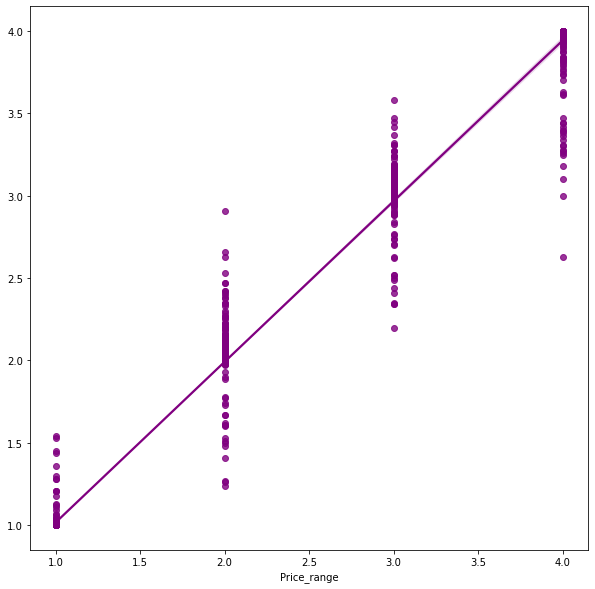

ExtraTreesRegressor()
Mean absolute error 0.02824843260188087
Mean squared error 0.011630525078369907
Root Mean squared error 0.1078449121580147
R2 Score 0.9840939403350836
At random state ExtraTreesRegressor(),the training accuracy is :- 1.0
At random state ExtraTreesRegressor(),the testing accuracy is :- 0.9840939403350836
Cross Validation Score: 0.94946838809534
Difference Between r2_score and CrossValidation Score: 0.03462555223974362
---------------------------------------------------------------------------------------------------------


In [212]:
for i in models:
    create_model(i)

Now Lets consider model which Model should we go for as a final model

Hyper parameter tuning

In [213]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [214]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(RandomForestRegressor(),params, cv=5)

In [215]:
RSCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 6],
                                        'min_samples_leaf': [3, 5, 6],
                                        'min_samples_split': [5, 6],
                                        'n_estimators': [13, 15, 17]})

In [216]:
RSCV.best_params_

{'n_estimators': 15,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 6}

In [217]:
Final_Model = RandomForestRegressor(n_estimators=15,min_samples_split=6,min_samples_leaf=3,max_depth=6)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 98.23999455341409


In [218]:
Final_Model

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=15)

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [236]:
GSCV=GridSearchCV(RandomForestRegressor(),params, cv=5)

In [237]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [3, 5, 6],
                         'min_samples_split': [5, 6],
                         'n_estimators': [13, 15, 17]})

In [238]:
GSCV.best_params_

{'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 13}

In [240]:
Last_Model = RandomForestRegressor(n_estimators=13,min_samples_split=5,min_samples_leaf=3,max_depth=6)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

R2 score for the Last_Model is: 98.22750570702354


In [231]:
Last_Model

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=17)

In [241]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [242]:
lasso= Lasso(alpha=0.0001)

In [243]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [244]:
lasso.score(x_train,y_train)

0.7225484050082687

In [245]:
lasso_pred=lasso.predict(x_test)

In [246]:
r2_score(y_test,lasso_pred)

0.7683619877396568

In [247]:
ridge=Ridge(alpha=0.1)

In [248]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [249]:
ridge.score(x_train,y_train)*100

72.25487388301197

In [250]:
ridge_pred=ridge.predict(x_test)

In [251]:
r2_score(y_test,ridge_pred)

0.7684067022835926

In [253]:
#saving the model
import joblib
joblib.dump(Final_Model,'ZomatoPri.pkl')

['ZomatoPri.pkl']

In [254]:
#Loading the saved model
ZomatoPri=joblib.load('ZomatoPri.pkl')

In [255]:
prediction = ZomatoPri.predict(x_test)
prediction

array([1.00042804, 1.65429318, 1.00042804, ..., 2.        , 2.        ,
       2.        ])

In [256]:
pd.DataFrame([ZomatoPri.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2         3         4     5         6     \
Predicted  1.000428  1.654293  1.000428  1.000428  1.000428   2.0  1.000428   
Original   1.000000  2.000000  1.000000  1.000000  1.000000   2.0  1.000000   

           7         8         9     ...  2542      2543      2544      2545  \
Predicted   2.0  1.000428  1.000428  ...   2.0  1.000428  3.004945  3.004945   
Original    2.0  1.000000  1.000000  ...   2.0  1.000000  3.000000  3.000000   

               2546  2547      2548  2549  2550  2551  
Predicted  2.290486   2.0  3.004945   2.0   2.0   2.0  
Original   2.000000   2.0  3.000000   2.0   2.0   2.0  

[2 rows x 2552 columns]

<AxesSubplot:xlabel='Price_range', ylabel='Density'>

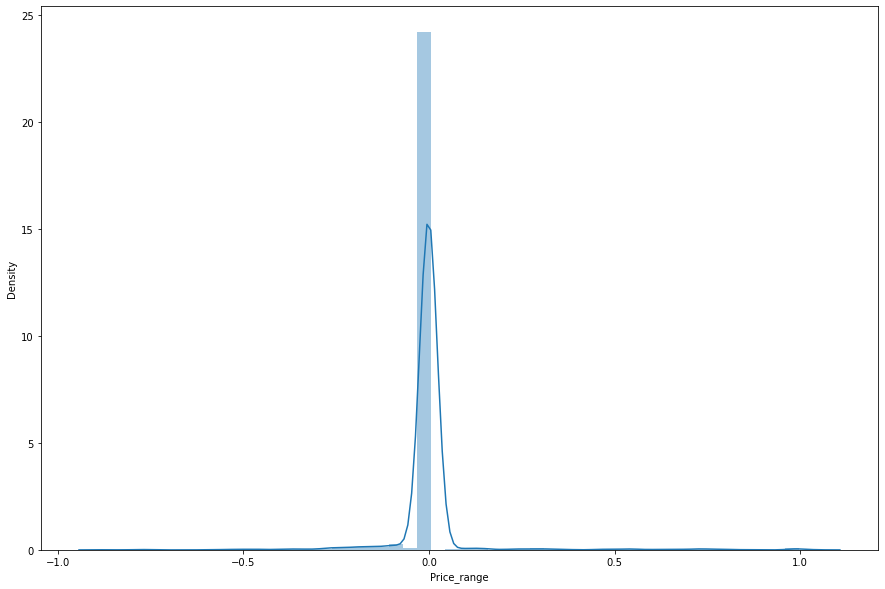

In [257]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [260]:
import pickle
filename = 'ZomatoPri.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))

In [261]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

98.23999455341409


<AxesSubplot:xlabel='Price_range', ylabel='Density'>

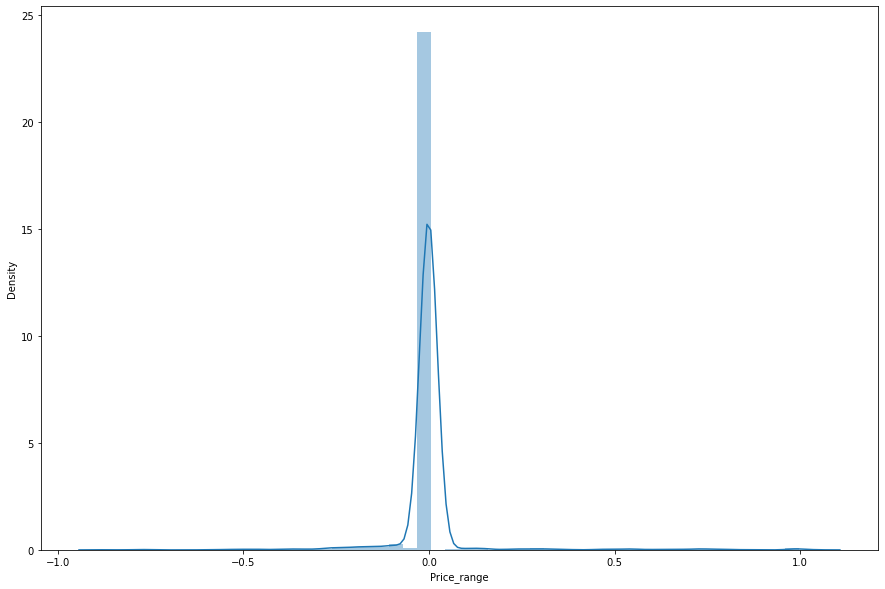

In [262]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)